### Description

#### Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.

##### Data Dictionary

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank? 
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?



#### Import Necessary Libraries

In [470]:
# this will help in making the Python code more structured automatically (good coding practice)
%reload_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
)
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    roc_auc_score,
    roc_curve,
    confusion_matrix,
    precision_recall_curve,
)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Read Data Set

In [2]:
loandata = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [3]:
# make copy of data to ensure integrity of original data
loan = loandata

<IPython.core.display.Javascript object>

In [4]:
# get random sample of data to review
np.random.seed(42)
loan.sample(n=10)

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
1501  1502   30           4      35    92130       2    0.3          2   
2586  2587   47          23     149    92675       4    6.1          1   
2653  2654   30           5     121    94555       2    3.1          1   
1055  1056   31           6      62    95630       1    1.0          1   
705    706   62          36      30    94720       3    0.7          2   
106    107   43          17      69    92717       4    2.9          1   
589    590   31           7     128    92821       1    6.0          1   
2468  2469   49          23     133    94304       1    7.3          1   
2413  2414   60          34      31    91007       2    1.0          3   
1600  1601   60          36     129    92028       2    6.0          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
1501         0              0                   1           0       0   
2586         0              1                   0           0       0   
2653       408              0                   0           0       1   
1055         0              0                   1           0       1   
705          0              0                   0           0       1   
106          0              0                   0           0       1   
589          0              0                   0           0       0   
2468         0              0                   0           0       1   
2413         0              0                   0           0       0   
1600         0              0                   0           0       1   

      CreditCard  
1501           1  
2586           1  
2653           0  
1055           0  
705            0  
106            1  
589            0  
2468           1  
2413           0  
1600           0

<IPython.core.display.Javascript object>

In [5]:
# review shape of data
print(f"There are {loan.shape[0]} rows and {loan.shape[1]} columns.")

There are 5000 rows and 14 columns.


<IPython.core.display.Javascript object>

In [6]:
# review information for data set
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

In [7]:
# check for missing values
loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

In [8]:
# drop loan ID number - not relevent
loan1 = loan.drop("ID", axis=1)

<IPython.core.display.Javascript object>

In [9]:
loan1.describe().T

count          mean          std      min      25%  \
Age                 5000.0     45.338400    11.463166     23.0     35.0   
Experience          5000.0     20.104600    11.467954     -3.0     10.0   
Income              5000.0     73.774200    46.033729      8.0     39.0   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.0   
Family              5000.0      2.396400     1.147663      1.0      1.0   
CCAvg               5000.0      1.937938     1.747659      0.0      0.7   
Education           5000.0      1.881000     0.839869      1.0      1.0   
Mortgage            5000.0     56.498800   101.713802      0.0      0.0   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.0   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.0   
CD_Account          5000.0      0.060400     0.238250      0.0      0.0   
Online              5000.0      0.596800     0.490589      0.0      0.0   
CreditCard          5000.0      0.294000     0.455637      0.0      0.0   

                        50%      75%      max  
Age                    45.0     55.0     67.0  
Experience             20.0     30.0     43.0  
Income                 64.0     98.0    224.0  
ZIPCode             93437.0  94608.0  96651.0  
Family                  2.0      3.0      4.0  
CCAvg                   1.5      2.5     10.0  
Education               2.0      3.0      3.0  
Mortgage                0.0    101.0    635.0  
Personal_Loan           0.0      0.0      1.0  
Securities_Account      0.0      0.0      1.0  
CD_Account              0.0      0.0      1.0  
Online                  1.0      1.0      1.0  
CreditCard              0.0      1.0      1.0

<IPython.core.display.Javascript object>

#### Observations
* minimum value for 'Experience' is -3, this could be data entry error
* large fluctuation in income - appears to be outliers in upper region
* something needs to be done with zip code as is more descriptive-location
* average family size 2-3 members
* not many customers have Personal Loans (target variable), Securities Account or CD accounts
* about half customers use online services
* more customers have credit cards, but still less than half-another opportunity for increased assets


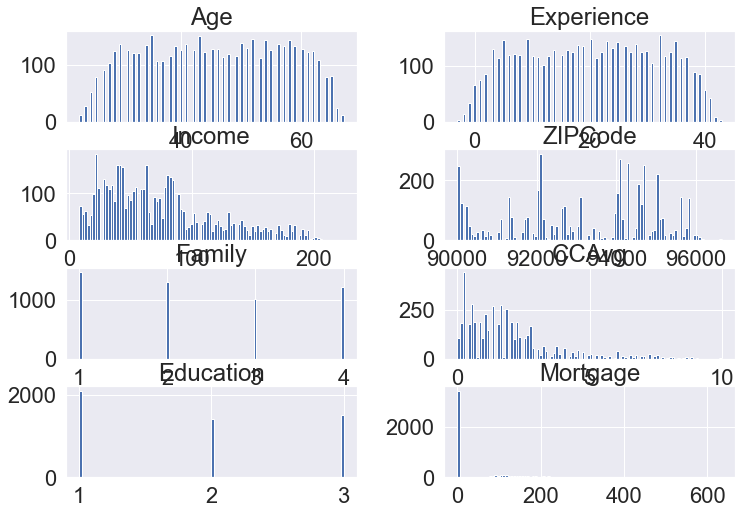

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [502]:
columns = list(loan1)[0:8]  # Excluding Outcome column which has only
loan1[columns].hist(stacked=False, bins=100, figsize=(12, 30), layout=(14, 2))
# Histogram of first 6 columns
# Note: Personal_Loan, Securities_Account, CD_Account, Online, and CreditCard were
# excluded because they were boolean/binary results -- yes or no, true or false

In [11]:
loan1.corr()

Age  Experience    Income   ZIPCode    Family  \
Age                 1.000000    0.994215 -0.055269 -0.030530 -0.046418   
Experience          0.994215    1.000000 -0.046574 -0.030456 -0.052563   
Income             -0.055269   -0.046574  1.000000 -0.030709 -0.157501   
ZIPCode            -0.030530   -0.030456 -0.030709  1.000000  0.027512   
Family             -0.046418   -0.052563 -0.157501  0.027512  1.000000   
CCAvg              -0.052012   -0.050077  0.645984 -0.012188 -0.109275   
Education           0.041334    0.013152 -0.187524 -0.008266  0.064929   
Mortgage           -0.012539   -0.010582  0.206806  0.003614 -0.020445   
Personal_Loan      -0.007726   -0.007413  0.502462 -0.002974  0.061367   
Securities_Account -0.000436   -0.001232 -0.002616  0.002422  0.019994   
CD_Account          0.008043    0.010353  0.169738  0.021671  0.014110   
Online              0.013702    0.013898  0.014206  0.028317  0.010354   
CreditCard          0.007681    0.008967 -0.002385  0.024033  0.011588   

                       CCAvg  Education  Mortgage  Personal_Loan  \
Age                -0.052012   0.041334 -0.012539      -0.007726   
Experience         -0.050077   0.013152 -0.010582      -0.007413   
Income              0.645984  -0.187524  0.206806       0.502462   
ZIPCode            -0.012188  -0.008266  0.003614      -0.002974   
Family             -0.109275   0.064929 -0.020445       0.061367   
CCAvg               1.000000  -0.136124  0.109905       0.366889   
Education          -0.136124   1.000000 -0.033327       0.136722   
Mortgage            0.109905  -0.033327  1.000000       0.142095   
Personal_Loan       0.366889   0.136722  0.142095       1.000000   
Securities_Account  0.015086  -0.010812 -0.005411       0.021954   
CD_Account          0.136534   0.013934  0.089311       0.316355   
Online             -0.003611  -0.015004 -0.005995       0.006278   
CreditCard         -0.006689  -0.011014 -0.007231       0.002802   

                    Securities_Account  CD_Account    Online  CreditCard  
Age                          -0.000436    0.008043  0.013702    0.007681  
Experience                   -0.001232    0.010353  0.013898    0.008967  
Income                       -0.002616    0.169738  0.014206   -0.002385  
ZIPCode                       0.002422    0.021671  0.028317    0.024033  
Family                        0.019994    0.014110  0.010354    0.011588  
CCAvg                         0.015086    0.136534 -0.003611   -0.006689  
Education                    -0.010812    0.013934 -0.015004   -0.011014  
Mortgage                     -0.005411    0.089311 -0.005995   -0.007231  
Personal_Loan                 0.021954    0.316355  0.006278    0.002802  
Securities_Account            1.000000    0.317034  0.012627   -0.015028  
CD_Account                    0.317034    1.000000  0.175880    0.278644  
Online                        0.012627    0.175880  1.000000    0.004210  
CreditCard                   -0.015028    0.278644  0.004210    1.000000

<IPython.core.display.Javascript object>

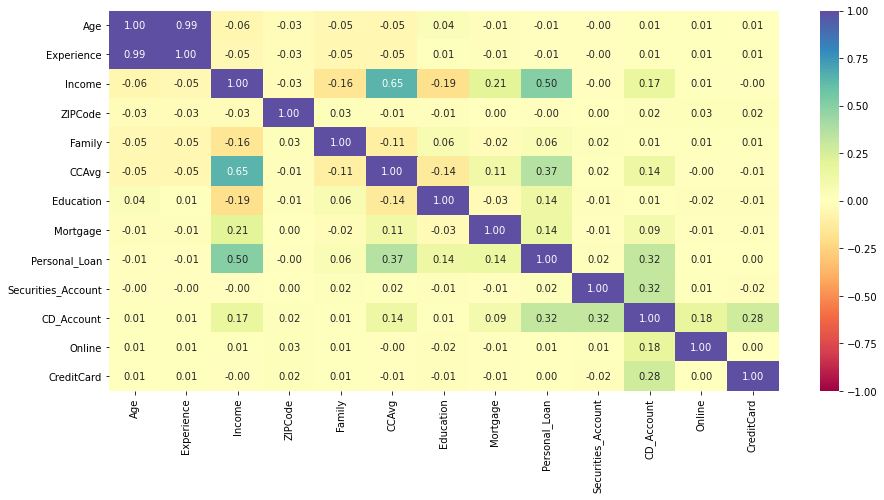

<IPython.core.display.Javascript object>

In [12]:
# correlation heat map
plt.figure(figsize=(15, 7))
sns.heatmap(loan1.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

There is an extremely high correlation between age and experience, therefore it is safe to drop one, as they are essentially redundant and will cause multicollinearity in the models.  Experience will be dropped because, as noted earlier, the minimum value is (-3) which is illogical as one cannot have less than zero years professional experience.  Possible data entry error.

In [13]:
# drop 'Experience'
loan2 = loan1.drop("Experience", axis=1)

<IPython.core.display.Javascript object>

In [14]:
loan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   ZIPCode             5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


<IPython.core.display.Javascript object>

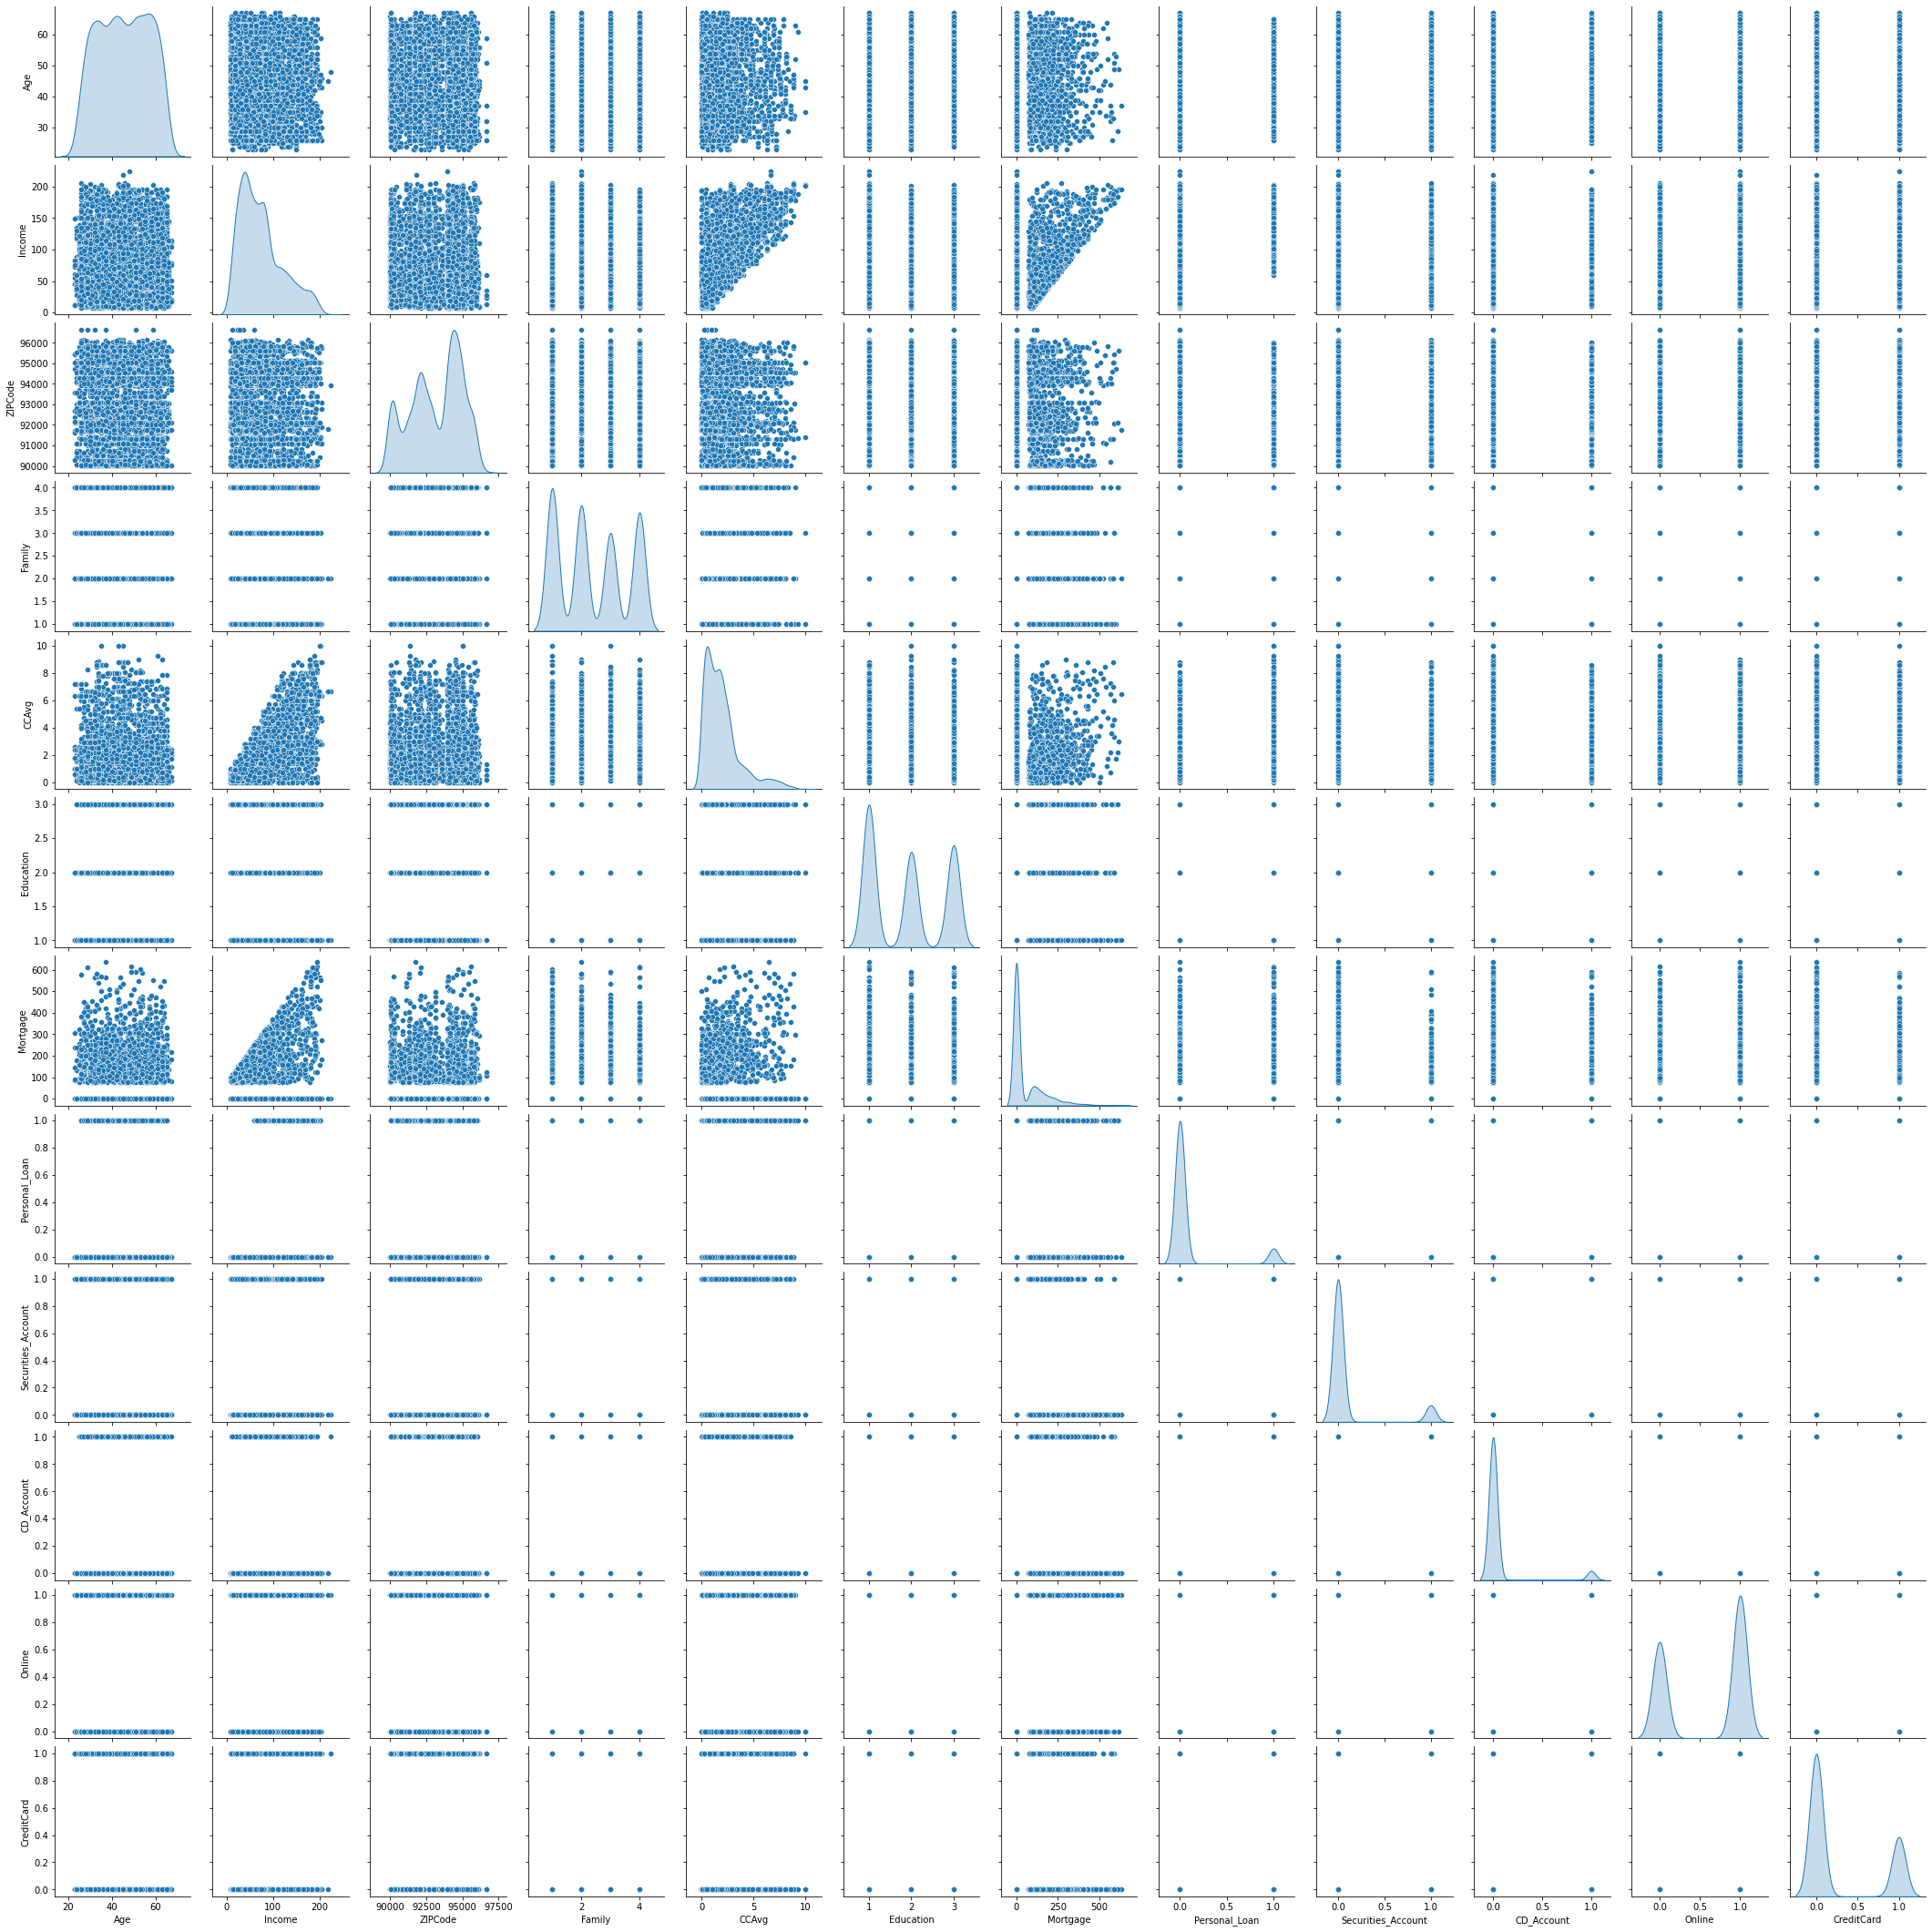

<IPython.core.display.Javascript object>

In [15]:
sns.pairplot(loan2, diag_kind="kde")

There is no other visible correlations now that 'Experience' has been dropped.

#### Review zip code information as it is really more categorical in nature

In [16]:
print(loan2.ZIPCode.value_counts())
print("\n\n")
print(f"There are {loan2.ZIPCode.nunique()} unique values for the zip code column.")

94720    169
94305    127
95616    116
90095     71
93106     57
        ... 
94970      1
92694      1
94404      1
94598      1
94965      1
Name: ZIPCode, Length: 467, dtype: int64



There are 467 unique values for the zip code column.


<IPython.core.display.Javascript object>

Because there are so many unique values for the zip code column, it is necessary to group or bin them geographically to reduce the unique values.  Begin with major city. 


In [17]:
# install and upgrade uszipcode package
!pip install uszipcode
!pip install --upgrade uszipcode

Requirement already up-to-date: uszipcode in c:\users\muttm\anaconda3\lib\site-packages (0.2.6)


<IPython.core.display.Javascript object>

In [18]:
from uszipcode import SearchEngine

search = SearchEngine(simple_zipcode=False)

city = []
for i in np.arange(0, len(loan2["ZIPCode"])):
    zipcode = search.by_zipcode(loan2["ZIPCode"][i])
    city.append(zipcode.major_city)

<IPython.core.display.Javascript object>

In [486]:
loan2["City"] = city
loan2.head()

Age  Income  ZIPCode  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25      49    91107       4    1.6          1         0              0   
1   45      34    90089       3    1.5          1         0              0   
2   39      11    94720       1    1.0          1         0              0   
3   35     100    94112       1    2.7          2         0              0   
4   35      45    91330       4    1.0          2         0              0   

   Securities_Account  CD_Account  Online  CreditCard           City  \
0                   1           0       0           0       Pasadena   
1                   1           0       0           0    Los Angeles   
2                   0           0       0           0       Berkeley   
3                   0           0       0           0  San Francisco   
4                   0           0       0           1     Northridge   

                 county  
0    Los Angeles County  
1    Los Angeles County  
2        Alameda County  
3  San Francisco County  
4    Los Angeles County

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [487]:
print(loan2.City.value_counts(dropna=False))
print("\n\n")
print(
    f"There are {loan2.City.nunique()} different major cities represented in the data set"
)

Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
                ... 
Sierra Madre       1
Ladera Ranch       1
Tahoe City         1
Sausalito          1
Stinson Beach      1
Name: City, Length: 245, dtype: int64



There are 244 different major cities represented in the data set


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

244 different major cities is quite alot.  Perhaps breaking the zip codes into counties would be more efficient. 

In [488]:
county = []
for i in np.arange(0, len(loan2["ZIPCode"])):
    zipcode = search.by_zipcode(loan2["ZIPCode"][i])
    county.append(zipcode.county)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [489]:
loan2["county"] = county
loan2.head()

Age  Income  ZIPCode  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25      49    91107       4    1.6          1         0              0   
1   45      34    90089       3    1.5          1         0              0   
2   39      11    94720       1    1.0          1         0              0   
3   35     100    94112       1    2.7          2         0              0   
4   35      45    91330       4    1.0          2         0              0   

   Securities_Account  CD_Account  Online  CreditCard           City  \
0                   1           0       0           0       Pasadena   
1                   1           0       0           0    Los Angeles   
2                   0           0       0           0       Berkeley   
3                   0           0       0           0  San Francisco   
4                   0           0       0           1     Northridge   

                 county  
0    Los Angeles County  
1    Los Angeles County  
2        Alameda County  
3  San Francisco County  
4    Los Angeles County

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [490]:
print(loan2.county.value_counts(dropna=False))
print("\n\n")
print(
    f"There are {loan2.county.nunique()} different counties represented in the data set"
)

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              339
San Francisco County       257
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             114
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
NaN                         34
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Siskiyou

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
loan2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   ZIPCode             5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  City                4966 non-null   object 
 13  county              4966 non-null   object 
dtypes: float64(1), int64(11), object(2)
memory usage: 547.0+ KB


<IPython.core.display.Javascript object>

Note that there are 34 missing values for both 'City' and 'county'.  These need to be filled in. 

In [491]:
# verify the missing values for 'City' and 'county' are in the same rows.
loan2.isnull().sum(axis=1).value_counts()

0    4966
2      34
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [492]:
# create a data subset with just the missing values for 'City' and 'county' to determine what zip
# codes are associated with the missing values
num_missing = loan2.isnull().sum(axis=1)
miss = loan2[num_missing == 2].sample(n=34)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now all the rows with the missing data are in one data set.  By running a value count on the 'ZIPCode' column, it is evident what zip codes correlate with the missing values. 

In [493]:
miss.ZIPCode.value_counts()

92717    22
96651     6
92634     5
93077     1
Name: ZIPCode, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Via internet searches, these 4 zip codes represent:
* 92717 - Santa Ana, CA Orange County, CA
* 96651 - San Francisco, CA , San Francisco County, CA
* 92634 - Fullerton, CA, Orange County, CA
* 93077 - Ventura, CA, Ventura County, CA

Now it is simply a matter of replacing the missing values in the 'loan2' data set with the relevent information. 

In [494]:
# replace the missing values with the appropriate values
loan2["county"] = np.where((loan2.ZIPCode == 92717), "Orange County", loan2.county)
loan2["City"] = np.where((loan2.ZIPCode == 92717), "Santa Ana", loan2.City)
loan2["county"] = np.where(
    (loan2.ZIPCode == 96651), "San Francisco County", loan2.county
)
loan2["City"] = np.where((loan2.ZIPCode == 96651), "San Francisco", loan2.City)
loan2["county"] = np.where((loan2.ZIPCode == 92634), "Orange County", loan2.county)
loan2["City"] = np.where((loan2.ZIPCode == 92634), "Fullerton", loan2.City)
loan2["county"] = np.where((loan2.ZIPCode == 93077), "Ventura County", loan2.county)
loan2["City"] = np.where((loan2.ZIPCode == 93077), "Ventura", loan2.City)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [495]:
# verify there are no missing values in any rows
loan2.isnull().sum(axis=1).value_counts()

0    5000
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [496]:
# review the value counts for county now that missing values are filled
loan2.county.value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              366
San Francisco County       263
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
Yolo County                130
Monterey County            128
Ventura County             115
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Kern County                 54
Marin County                54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Butte County                19
Shasta County               18
El Dorado County            17
Stanislaus County           15
San Benito County           14
San Joaquin County          13
Mendocino County             8
Tuolumne County              7
Siskiyou

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

To further reduce the unique values for county, it is necessary to bundle all counties with a value count of less than 20 into a single 'County-other' category

In [497]:
loan2["county"] = loan2["county"].str.replace("Butte County", "County-Other")
loan2["county"] = loan2["county"].str.replace("Shasta County", "County-Other")
loan2["county"] = loan2["county"].str.replace("El Dorado County", "County-Other")
loan2["county"] = loan2["county"].str.replace("Stanislaus County", "County-Other")
loan2["county"] = loan2["county"].str.replace("San Benito County", "County-Other")
loan2["county"] = loan2["county"].str.replace("San Joaquin County", "County-Other")
loan2["county"] = loan2["county"].str.replace("Mendocino County", "County-Other")
loan2["county"] = loan2["county"].str.replace("Siskiyou County", "County-Other")
loan2["county"] = loan2["county"].str.replace("Tuolumne County", "County-Other")
loan2["county"] = loan2["county"].str.replace("Merced County", "County-Other")
loan2["county"] = loan2["county"].str.replace("Lake County", "County-Other")
loan2["county"] = loan2["county"].str.replace("Trinity County", "County-Other")
loan2["county"] = loan2["county"].str.replace("Napa County", "County-Other")
loan2["county"] = loan2["county"].str.replace("Imperial County", "County-Other")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [498]:
loan2.county.value_counts()

Los Angeles County        1095
San Diego County           568
Santa Clara County         563
Alameda County             500
Orange County              366
San Francisco County       263
San Mateo County           204
Sacramento County          184
Santa Barbara County       154
County-Other               136
Yolo County                130
Monterey County            128
Ventura County             115
San Bernardino County      101
Contra Costa County         85
Santa Cruz County           68
Riverside County            56
Marin County                54
Kern County                 54
Solano County               33
San Luis Obispo County      33
Humboldt County             32
Sonoma County               28
Fresno County               26
Placer County               24
Name: county, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [499]:
loan2.county.nunique()

25

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [500]:
# drop 'ZIPCode' column
loan3 = loan2.drop("ZIPCode", axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [501]:
loan3.head()

Age  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25      49       4    1.6          1         0              0   
1   45      34       3    1.5          1         0              0   
2   39      11       1    1.0          1         0              0   
3   35     100       1    2.7          2         0              0   
4   35      45       4    1.0          2         0              0   

   Securities_Account  CD_Account  Online  CreditCard           City  \
0                   1           0       0           0       Pasadena   
1                   1           0       0           0    Los Angeles   
2                   0           0       0           0       Berkeley   
3                   0           0       0           0  San Francisco   
4                   0           0       0           1     Northridge   

                 county  
0    Los Angeles County  
1    Los Angeles County  
2        Alameda County  
3  San Francisco County  
4    Los Angeles County

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Univarate Analysis


#### Observations on personal loans

In [36]:
def histogram_boxplot(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2)  # setting the font scale for seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid=2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="red"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        feature.mean(), color="g", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        feature.median(), color="black", linestyle="-"
    )  # Add median to the histogram


<IPython.core.display.Javascript object>

In [37]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

##### Observations on Personal Loans (target variable)

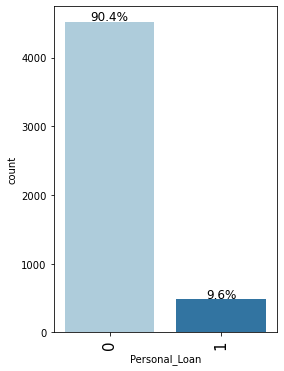

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(loan3, "Personal_Loan", perc=True)

9.6% of customers have personal loans, the goal is to increase this percentage so it is necessary to assess the other attributes of customers who have personal loans to determine what are the most likely characteristics that are associated with customers who have loans

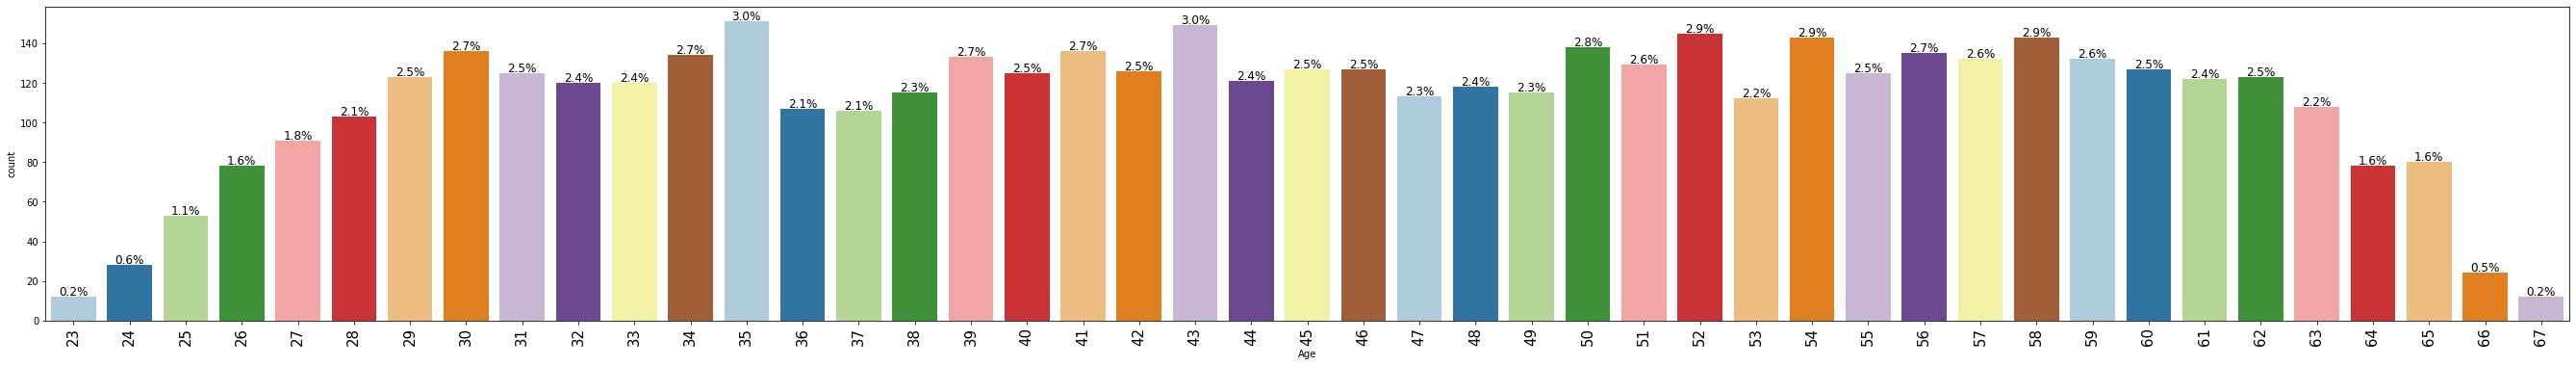

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(loan3, "Age", perc=True)

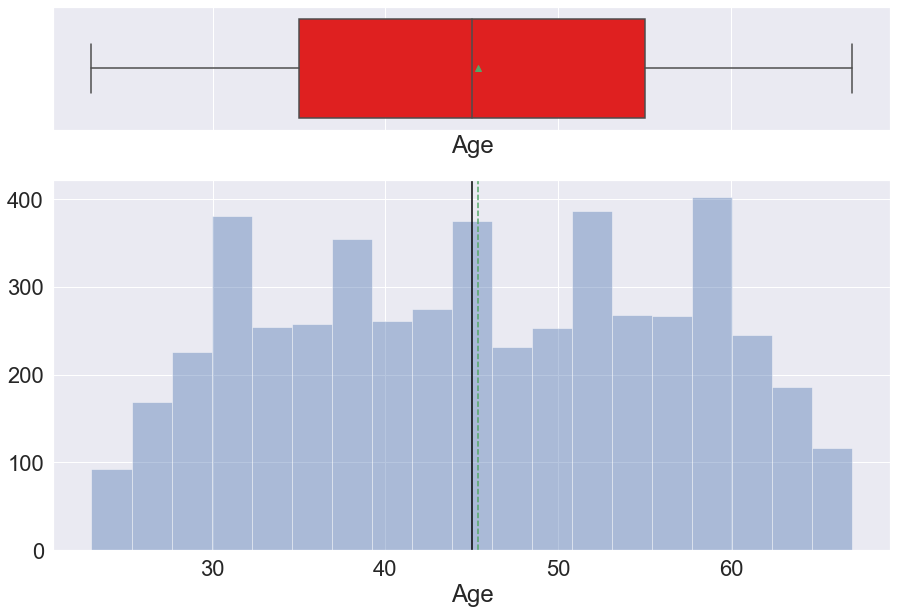

<IPython.core.display.Javascript object>

In [41]:
histogram_boxplot(loan3.Age)

Age appears to be fairly evenly distributed between 29 and 63, with the youngest customer being 23 and the oldest customer being 67, the mean and median are reasonably close enough together to assume there are no outliers

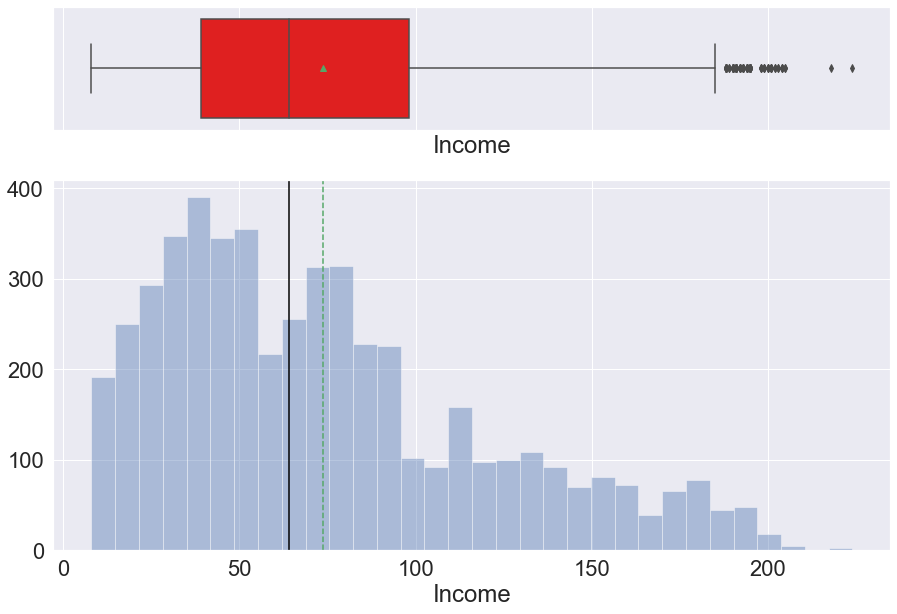

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [503]:
histogram_boxplot(loan3.Income)

Income is slightly right skewed with few outliers, the median is aproximately 10k USD below the mean

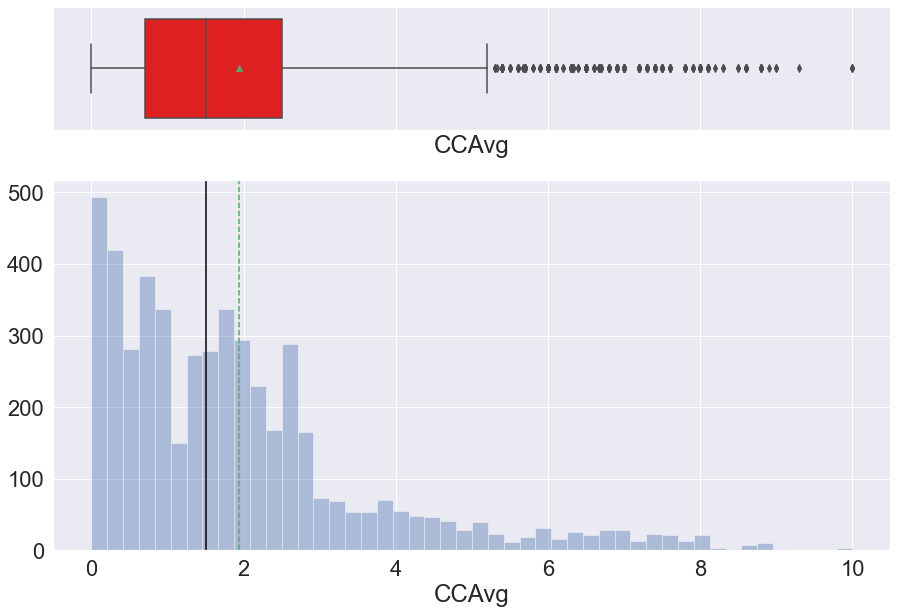

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [504]:
histogram_boxplot(loan3.CCAvg)

Average monthy credit card usage is right skewed with outliers.  The median is approximately 400 USD below the mean.

#### Review customers participation in other banking products and services

###### Securities Account

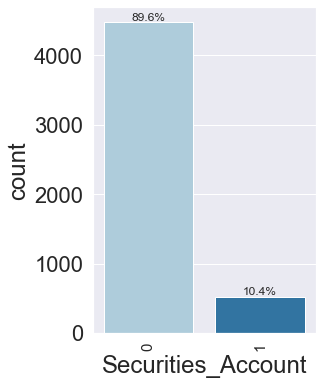

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(loan3, "Securities_Account", perc=True)

A slightly higher percentage have a securities account with the bank.  A security account is comparable to a brokerage account. These type of accounts hold assets such as securities on behalf of the customer.

###### CD Account

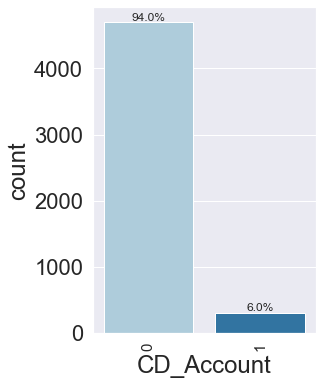

<IPython.core.display.Javascript object>

In [43]:
labeled_barplot(loan3, "CD_Account", perc=True)

Only 6.0% of customers hold a CD account.  A CD is a certificate of deposit is a low risk savings tool that allows customers to deposit funds for a specific period of time for a specified interest rate.  Funds cannot be withdrawn without penalties prior to the end of the term.

###### Online services

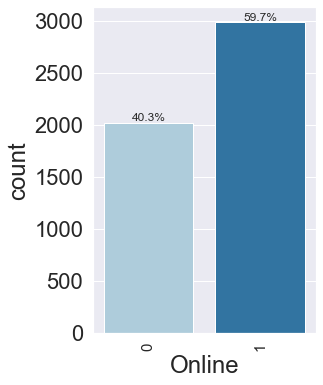

<IPython.core.display.Javascript object>

In [44]:
labeled_barplot(loan3, "Online", perc=True)

59.6% of customers use the online banking services.  While these services vary from bank to bank, they usually offer immediate access to account activity, on line bill paying, funds transfer, loan payments, etc.

###### Credit Card

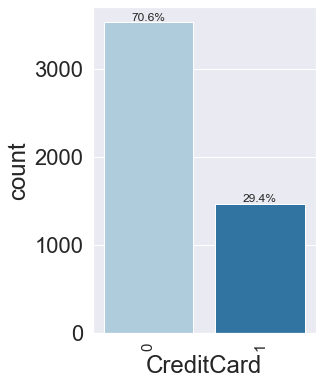

<IPython.core.display.Javascript object>

In [45]:
labeled_barplot(loan3, "CreditCard", perc=True)

Only 29.4% of customers use credit cards issued by other banks.  Another bit of useful information would have been the allocation of customers with credit cards issued by AllLife Bank as well as those using cards from other banks. This is another opportunity to increase asset customers.

##### Observations on Geographic Locations - City vs. County

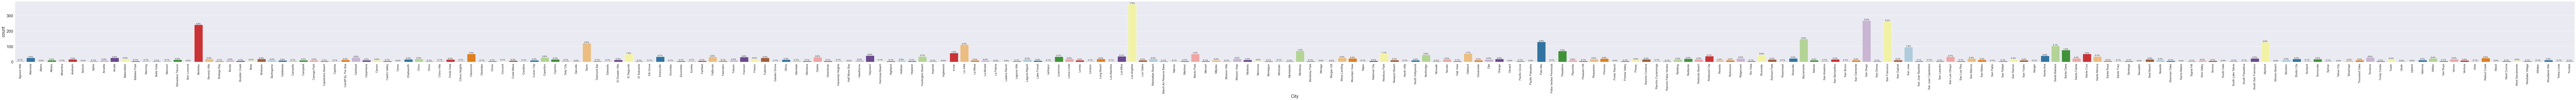

<IPython.core.display.Javascript object>

In [46]:
labeled_barplot(loan3, "City", perc=True)

As stated earlier, there are quite a few major cities, too many for a clean analysis, this column should also be dropped

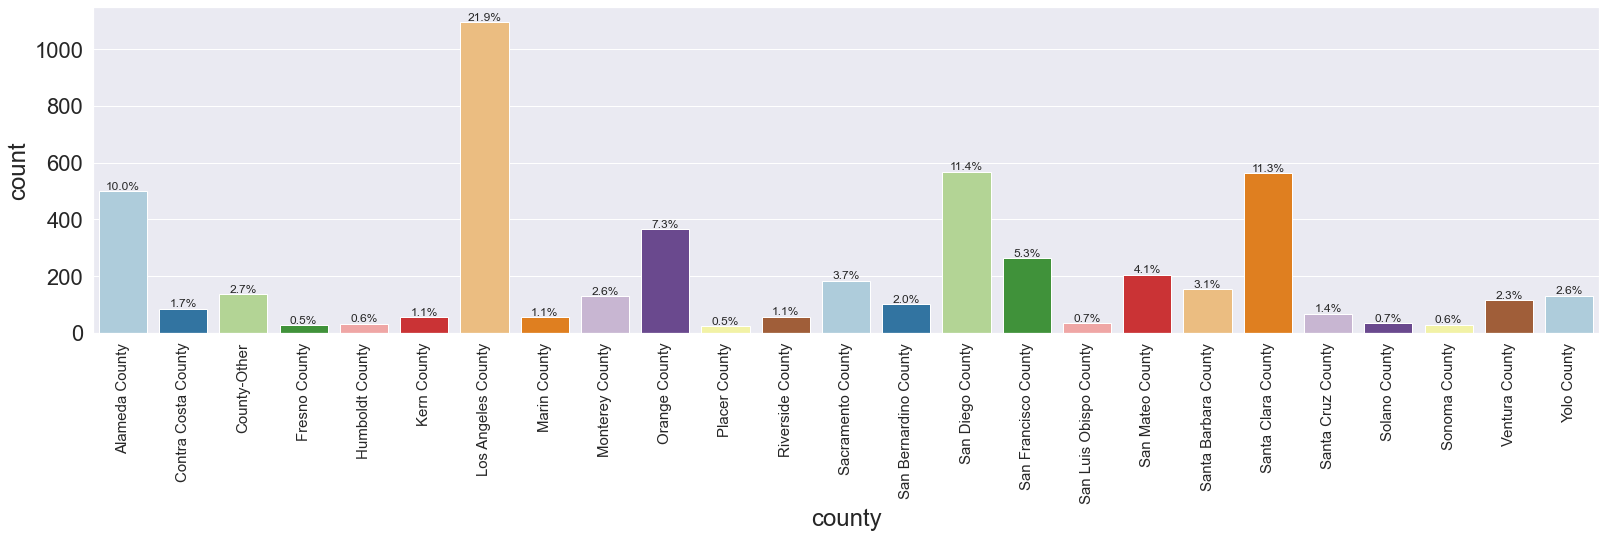

<IPython.core.display.Javascript object>

In [47]:
labeled_barplot(loan2, "county", perc=True)

While there are still quite a few unique values in 'county', it is more reasonable

##### Drop 'City' column

In [48]:
loan4 = loan3.drop("City", axis=1)

<IPython.core.display.Javascript object>

In [49]:
loan4.head()

Age  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25      49       4    1.6          1         0              0   
1   45      34       3    1.5          1         0              0   
2   39      11       1    1.0          1         0              0   
3   35     100       1    2.7          2         0              0   
4   35      45       4    1.0          2         0              0   

   Securities_Account  CD_Account  Online  CreditCard                county  
0                   1           0       0           0    Los Angeles County  
1                   1           0       0           0    Los Angeles County  
2                   0           0       0           0        Alameda County  
3                   0           0       0           0  San Francisco County  
4                   0           0       0           1    Los Angeles County

<IPython.core.display.Javascript object>

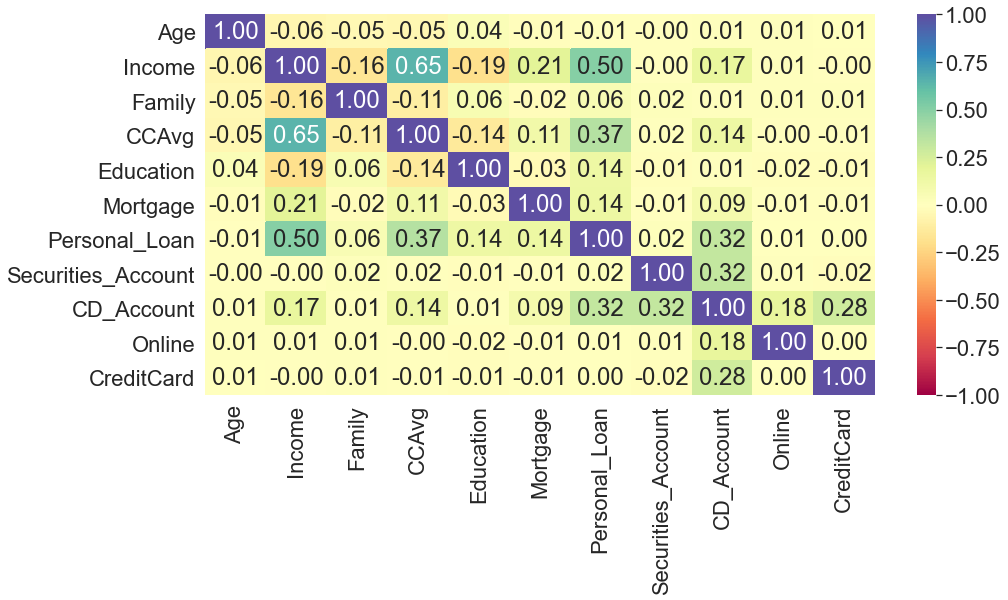

<IPython.core.display.Javascript object>

In [50]:
plt.figure(figsize=(15, 7))
sns.heatmap(loan4.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

#### Bivariate Analysis

In [350]:
# function to plot stacked bar chart and list cross tabulations of data


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [52]:
### function to plot distributions wrt target
## w.r.t.- with respect to target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

##### Personal Loans Vs. Age

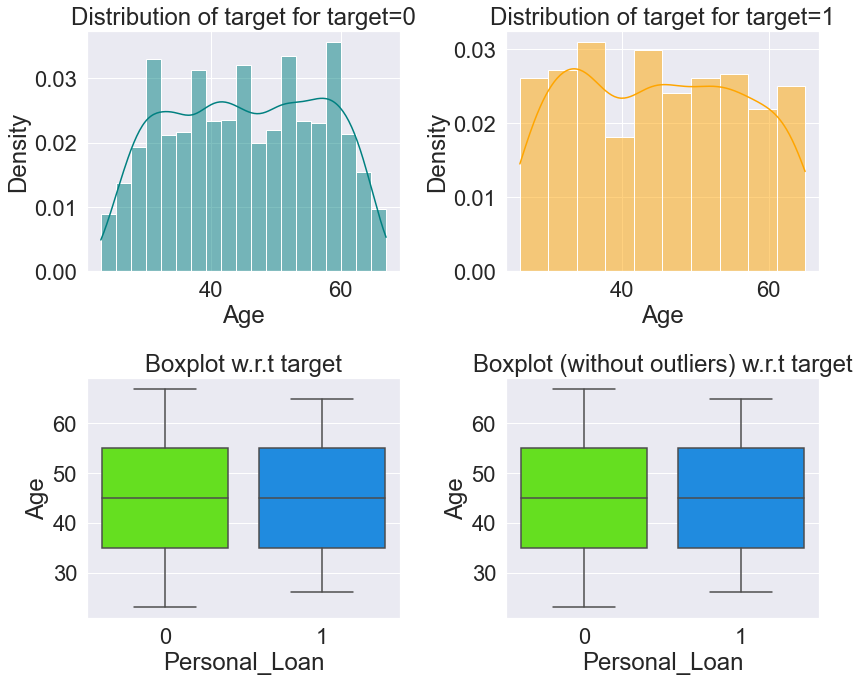

<IPython.core.display.Javascript object>

In [53]:
distribution_plot_wrt_target(loan4, "Age", "Personal_Loan")

There doesn't appear to be any pattern to customers who previously accepted personal loans in relation to age, the distribution appears fairly normal

##### Personal Loan Vs. Income

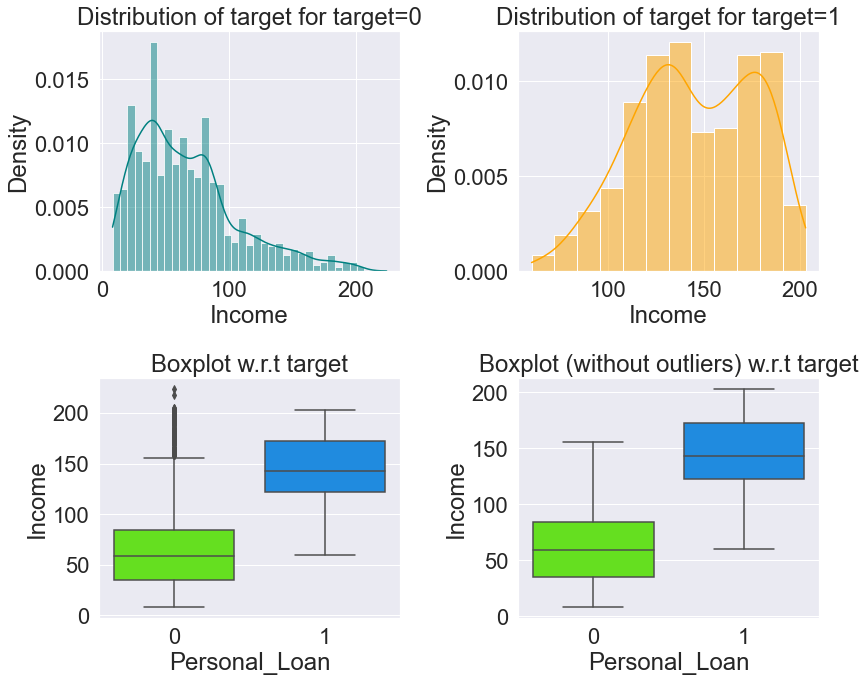

<IPython.core.display.Javascript object>

In [54]:
distribution_plot_wrt_target(loan4, "Income", "Personal_Loan")

According to the earlier table on the data set descriptives, the mean income of this sampling is approximately 74k USD annually, the upper quartile is anything above 98k USD.  This graph suggests that the majority of customers who accepted personal loans in the previous campaign are at or above the 75% quartile.

##### Personal Loan Vs. Family Size

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


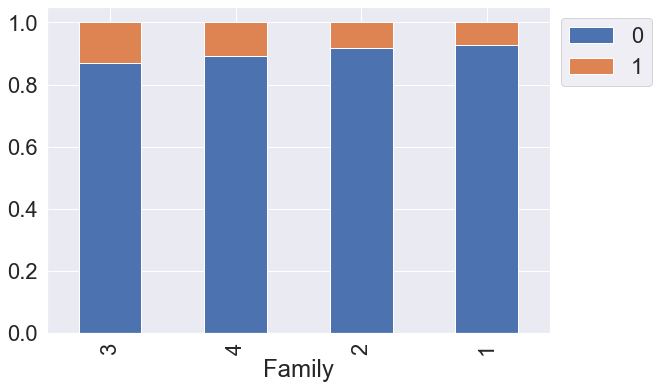

<IPython.core.display.Javascript object>

In [55]:
stacked_barplot(loan4, "Family", "Personal_Loan")

Customers with 3 or 4 family members were more likely to accept personal loans during the previous campaign.

##### Personal Loan Vs. Credit Card Average

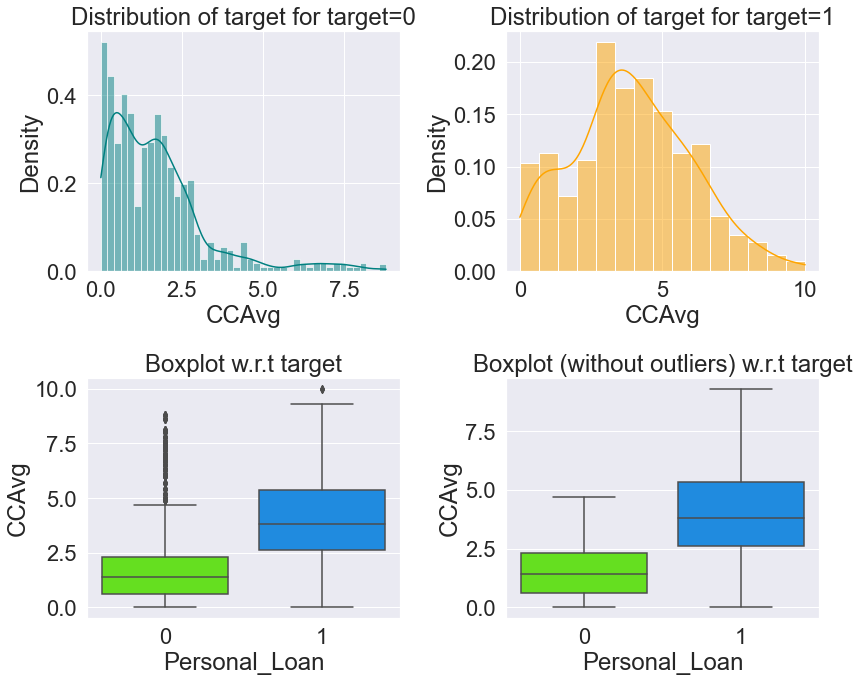

<IPython.core.display.Javascript object>

In [56]:
distribution_plot_wrt_target(loan4, "CCAvg", "Personal_Loan")

The mean for monthly credit card spending is 1.97k USD with the upper 75% quartile being at 2.5k USD.  This graph suggests that the majority of customers who accepted a personal loan previously also are above the 75% quartile in regards to credit card spending.

##### Personal Loan Vs. Level of Education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


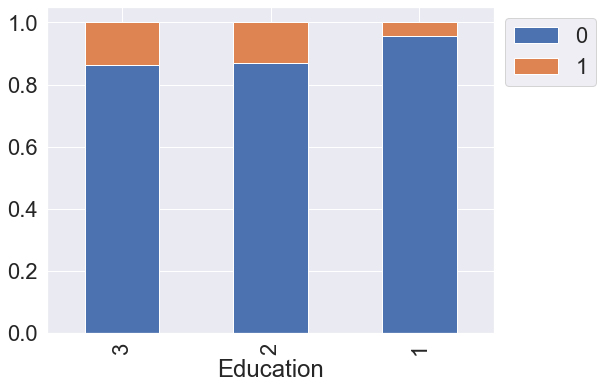

<IPython.core.display.Javascript object>

In [57]:
stacked_barplot(loan4, "Education", "Personal_Loan")

Customers with higher levels of education accepted personal loan previously than those with less education. 

##### Personal Loan Vs. Mortgage Balances

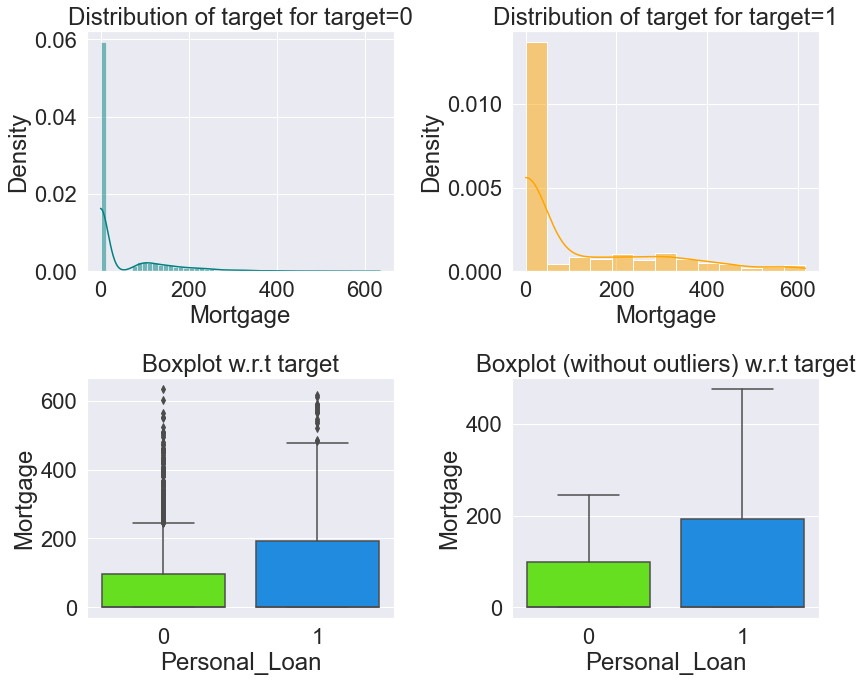

<IPython.core.display.Javascript object>

In [58]:
distribution_plot_wrt_target(loan4, "Mortgage", "Personal_Loan")

Customers with a mortgage valued in excess of 200k USD appear more likely to have accepted personal loans.

##### Personal Loan Vs. Securities Account

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


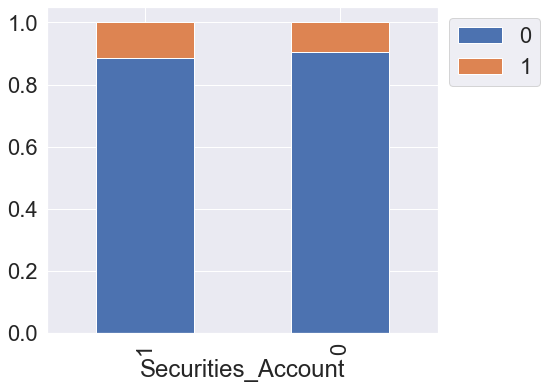

<IPython.core.display.Javascript object>

In [59]:
stacked_barplot(loan4, "Securities_Account", "Personal_Loan")

Customers with a securities account appear to be slightly more inclined to accept personal loan previously than those without.

##### Personal Loan Vs. Certificate of Deposit Accounts

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


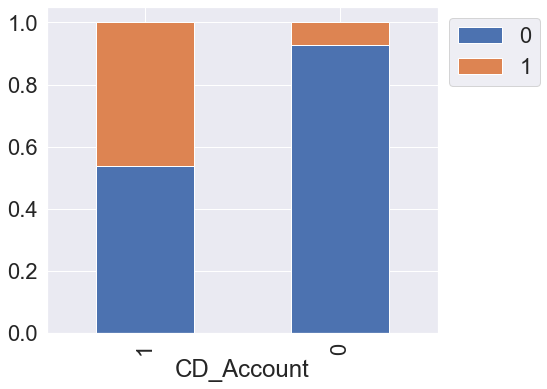

<IPython.core.display.Javascript object>

In [60]:
stacked_barplot(loan4, "CD_Account", "Personal_Loan")

Customers with certificates of deposits were much more likely to have accepted a personal loan in the previous campaign than those without them.

##### Personal Loans Vs. Online Banking Services

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


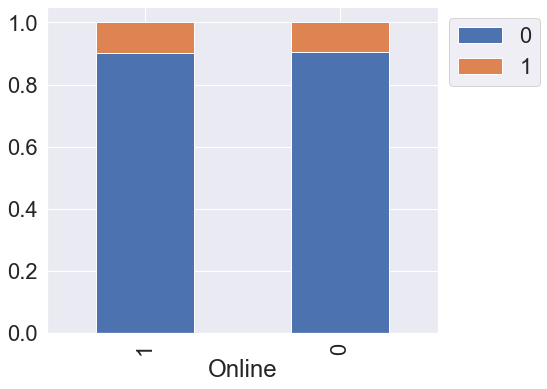

<IPython.core.display.Javascript object>

In [61]:
stacked_barplot(loan4, "Online", "Personal_Loan")

Previous personal loan acceptance appear to be fairly evenly distributed between those who use and don't use online banking services

##### Personal Loans Vs. Credit Cards issued by other banks

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


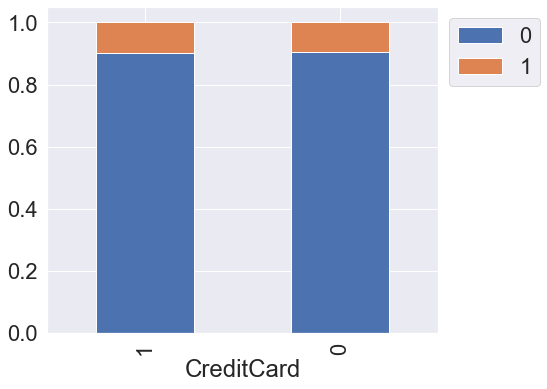

<IPython.core.display.Javascript object>

In [62]:
stacked_barplot(loan4, "CreditCard", "Personal_Loan")

Again, personal loans appear to be fairly evenly distributed between customers with a credit card issued from other banks as opposed to those who do not have one. 

Personal_Loan                  0         1
county                                    
Sonoma County           0.785714  0.214286
San Luis Obispo County  0.848485  0.151515
Contra Costa County     0.858824  0.141176
Kern County             0.870370  0.129630
Santa Clara County      0.873890  0.126110
Santa Cruz County       0.882353  0.117647
Monterey County         0.882812  0.117188
Marin County            0.888889  0.111111
Riverside County        0.892857  0.107143
San Diego County        0.896127  0.103873
Los Angeles County      0.898630  0.101370
All                     0.904000  0.096000
Ventura County          0.904348  0.095652
Solano County           0.909091  0.090909
Orange County           0.909836  0.090164
Alameda County          0.912000  0.088000
Placer County           0.916667  0.083333
Sacramento County       0.918478  0.081522
Fresno County           0.923077  0.076923
San Francisco County    0.927757  0.072243
Santa Barbara County    0.928571  0.071429
County-Othe

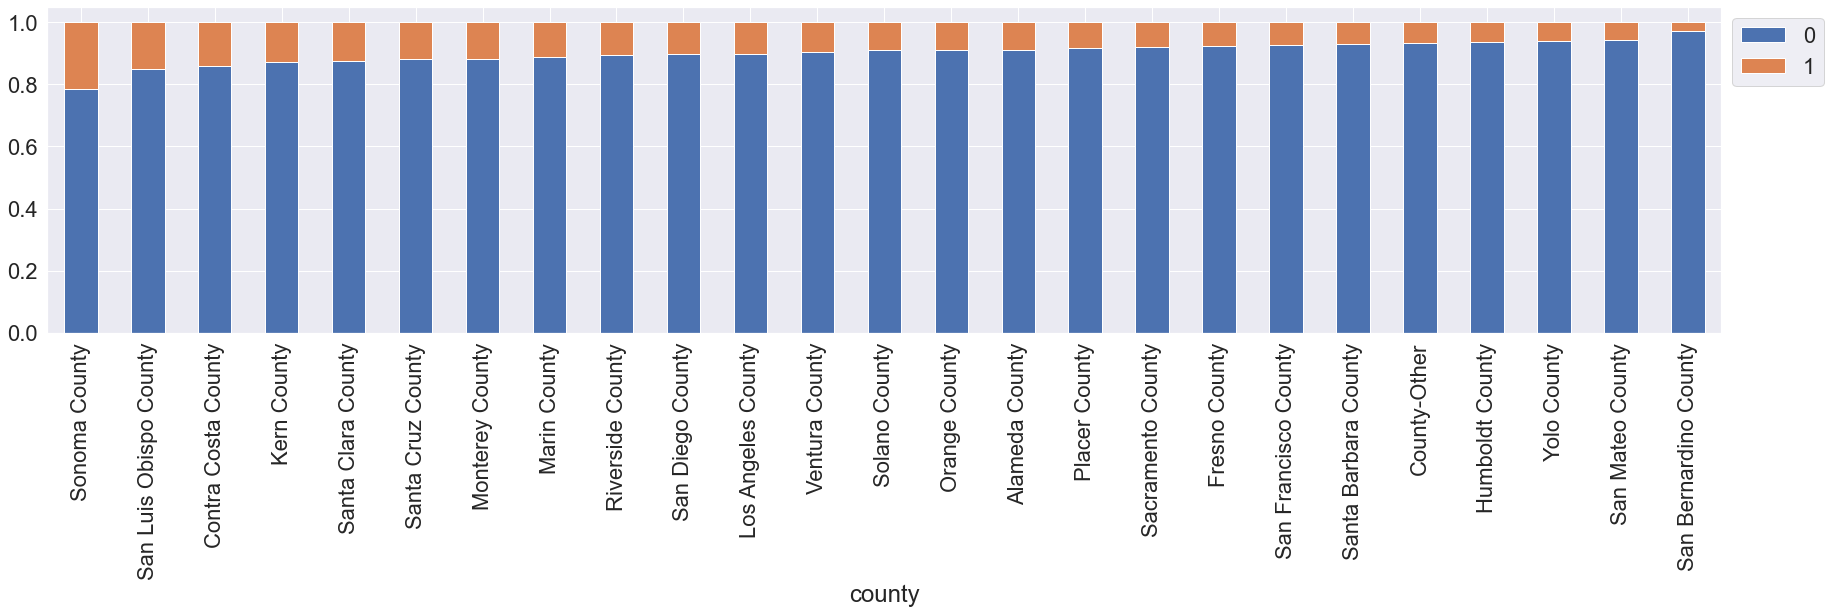

<IPython.core.display.Javascript object>

In [65]:
stacked_barplot1(loan4, "county", "Personal_Loan")

While Sonoma and San Luis Obispo counties only account for 28 and 33 customers out of the entire data set of 5000, those 2 counties have the highest percentages of acceptance of personal loans in the previous campaign

#### Key Observations

* Customers with an income in excess of 98k USD appear to be more likely to have accepted personal loans previously
* Customers who spend a minimum of 2.5k USD on credit cards monthly are more likely to have accepted a personal loan from the earlier campaign
* Customers with a mortgage balance of 200k USD or more appear to have accepted a personal loan previously
* Customers with certificates of deposit appear to have accepted personal loans in a much larger proportion than those without previously
* Further analysis should be place on a county by county basis.  Los Angeles County represents the greatest number of customers in the data set, however, percentage wise, Sonoma and San Luis Obispo have a higher percentage of customers accepting personal loans from the previous campaign

   ### Data Preparation

In [353]:
# separate the target variable from the remainder of the data set
x = loan4.drop("Personal_Loan", axis=1)
y = loan4["Personal_Loan"]

# create dummy variables
x = pd.get_dummies(x, drop_first=True)

# add constant
X = sm.add_constant(x)

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [354]:
print(
    f"The training data set has {x_train.shape[0]} rows and {x_train.shape[1]} columns."
)
print(f"The testing data set has {x_test.shape[0]} rows and {x_test.shape[1]} columns.")

The training data set has 3500 rows and 34 columns.
The testing data set has 1500 rows and 34 columns.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [355]:
print(
    f"The allocation of customers who did not accept a personal loan in the training set is {round(y_train.value_counts(normalize=True)[0],3)}"
)
print(
    f"The allocation of customers who did accept a personal loan in the training set is {round(y_train.value_counts(normalize=True)[1],3)}"
)
print("\n")
print(
    f"The allocation of customers who did not accept a personal loan in the testing set is {round(y_test.value_counts(normalize=True)[0],3)}"
)
print(
    f"The allocation of customers who did accept a personal loan in the testing set is {round(y_test.value_counts(normalize=True)[1],3)}"
)

The allocation of customers who did not accept a personal loan in the training set is 0.905
The allocation of customers who did accept a personal loan in the training set is 0.095


The allocation of customers who did not accept a personal loan in the testing set is 0.901
The allocation of customers who did accept a personal loan in the testing set is 0.099


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Logistic Regression (with Sklearn library)


In [356]:
lr = LogisticRegression(solver="newton-cg", random_state=1, fit_intercept=False)
model = lr.fit(x_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Check performance on Training Set

In [358]:
# predict on training set
y_pred_train = lr.predict(x_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The Performance metrics for this analysis include:
* **Accuracy** refers to how frequently the model predicted correctly - did it correctly predict which customer would or would not accept a personal loan?
* **Recall** (also called *Sensitivity*) also looks at the positive outcomes, but ALL customers who accepted a loan, whether predicted to or not
* **Precision** looks only at predicted positive outcomes - regardless if correctly predicted to be positive or not - it is calculated by taking the total number of customers where were predicted to and did accept a loan and divide it by the total number of customers predicted to accept the loan whether accurate or not
* **F1**  is the weighted average of Precision and Recall, it is another measure of accuracy and is more accurate when the data set has an uneven class distribution.  In this data set, the distribution is uneven because there are many more customers who did not accept the loan as opposed to those that did.  Therefore the F1 score is more meaningful than the Accuracy score.

In [359]:
# function to generate Performance Metrics for models
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [360]:
def make_confusion_matrix(
    model, library, test_X, y_actual, threshold=0.5, labels=[1, 0]
):
    """
    model : classifier to predict values of X
    library: Takes two arguments stats for statsmodels and sklearn for sklearn library
    test_X: test set
    y_actual : ground truth
    threshold: thresold for classifiying the observation as 1

    """

    if library == "sklearn":
        y_predict = model.predict(test_X)
        cm = metrics.confusion_matrix(y_actual, y_predict, labels=[1, 0])
        df_cm = pd.DataFrame(
            cm,
            index=[i for i in ["Actual Accept", "Actual Not Accept"]],
            columns=[i for i in ["Predicted Accept", "Predicted Not Accept"]],
        )
        group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
        group_percentages = [
            "{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)
        ]
        labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
        labels = np.asarray(labels).reshape(2, 2)
        plt.figure(figsize=(10, 7))
        sns.heatmap(df_cm, annot=labels, fmt="")
        plt.ylabel("True label")
        plt.xlabel("Predicted label")

    elif library == "stats":
        y_predict = model.predict(test_X) > threshold
        cm = metrics.confusion_matrix(y_actual, y_predict, labels=[1, 0])
        df_cm = pd.DataFrame(
            cm,
            index=[i for i in ["Actual Accept", "Actual Not Accept"]],
            columns=[i for i in ["Predicted Accept", "Predicted Not Accept"]],
        )
        group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
        group_percentages = [
            "{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)
        ]
        labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
        labels = np.asarray(labels).reshape(2, 2)
        plt.figure(figsize=(10, 7))
        sns.heatmap(df_cm, annot=labels, fmt="")
        plt.ylabel("True label")
        plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



Training Data


   Accuracy    Recall  Precision        F1
0  0.923143  0.429003    0.63964  0.513562


Testing Data


   Accuracy    Recall  Precision        F1
0  0.907333  0.342282   0.554348  0.423237




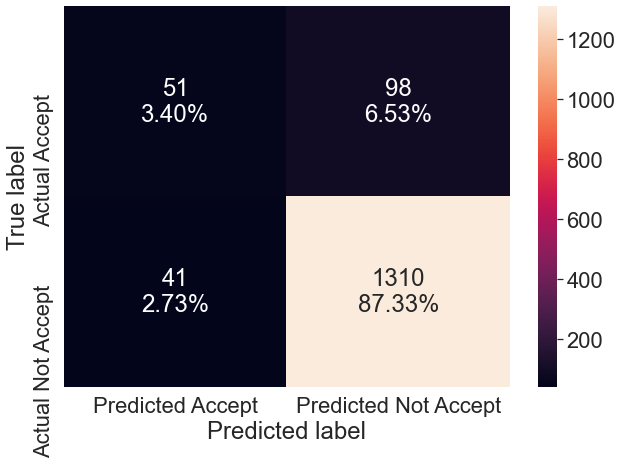

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [361]:
# confusion matrix

make_confusion_matrix(lr, "sklearn", x_test, y_test)

# Let's check model performance metrics for this model
print("\n")
print("Training Data")
print("\n")
scores_lr = model_performance_classification_statsmodels(lr, x_train, y_train)
print(scores_lr)
print("\n")
print("Testing Data")
print("\n")
scores_lr = model_performance_classification_statsmodels(lr, x_test, y_test)
print(scores_lr)
print("\n")

* Reviewing the performance metrics as well as the confusion matrix it is obvious that this model is not very accurate even though the accuracy scores for both the training and testing data are 92.3% and 90.7% respectively.  
* The recall scores are 42.9% and 34.2% on the train and test data respectively, suggesting that the number of predicted acceptances is fairly low in comparison to all actual acceptances.
* The precision scores show that actual acceptances compared to predicted acceptances were only correct 63.9% for the training data and 55.4% for the testing data.
* Once again, because class distribution of those accepting personal loans as opposed to those not accepting a loan is very unequal, the F1 scores are a more precise reflection of accuracy than the Accuracy score. These scores show that the model is really only accurate 51.3% of the time for the training data set and 42.3% of the time for the testing data set. 

### Logistic Regression (with Statsmodel library)


Building a logistic regression model using the statsmodel library will help identify significant variables that will help increase the Recall, Precision and F1 metrics. 

#### Logistic Regression (Statsmodel library)

In [362]:
# separate target variable from others
x = loan4.drop("Personal_Loan", axis=1)
y = loan4["Personal_Loan"]

# create dummy columns
x = pd.get_dummies(x, drop_first=True)

# adding constant
x = sm.add_constant(x)

# Split data in train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, random_state=1
)

logit = sm.Logit(y_train, x_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3465
Method:                           MLE   Df Model:                           34
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6156
Time:                        17:22:54   Log-Likelihood:                -421.14
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.258e-261
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -14.1701      0.888    -15.955      0.000     -15.911     -12.429
Age                               0.0043      0.008      0.527      0.598 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [363]:
print("Training Data")
scores_lg = model_performance_classification_statsmodels(lg, x_train, y_train)
print(scores_lg)
print("\n")
print("Testing Data")
scores_lg_test = model_performance_classification_statsmodels(lg, x_test, y_test)
print(scores_lg_test)

Training Data
   Accuracy    Recall  Precision        F1
0  0.957143  0.667674   0.846743  0.746622


Testing Data
   Accuracy    Recall  Precision        F1
0  0.945333  0.577181   0.819048  0.677165


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Notice while Accuracy is still above 94% for both the testing and training data sets with this model, the other three metrics, Recall, Precision and F1 are somewhat lower.  By checking for multicollinearity using Variance Inflation Factor and eliminating the variables that are correlated, this will increase the desired metrics. 

In [364]:
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                            44.298117
Age                               1.017863
Income                            1.883613
Family                            1.038967
CCAvg                             1.747150
Education                         1.051899
Mortgage                          1.055562
Securities_Account                1.152216
CD_Account                        1.362064
Online                            1.051062
CreditCard                        1.118781
county_Contra Costa County        1.140538
county_County-Other               1.212314
county_Fresno County              1.034473
county_Humboldt County            1.062502
county_Kern County                1.093404
county_Los Angeles County         2.428649
county_Marin County               1.090947
county_Monterey County            1.218105
county_Orange County              1.602792
county_Placer County              1.046483
county_Riverside County           1.088308
county_Sacramento C

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Because experience was dropped early in the data cleaning process there doesn't appear to be any other multicollinearity.  The next step is to review p-values for significance.  Recall, any p-value above .05 is insignificant.  Start by generating a summary of the 'lg' model again for review.

In [365]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3465
Method:                           MLE   Df Model:                           34
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6156
Time:                        17:23:41   Log-Likelihood:                -421.14
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.258e-261
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -14.1701      0.888    -15.955      0.000     -15.911     -12.429
Age                               0.0043      0.008      0.527      0.598 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [366]:
x_test1 = x_test.drop("Age", axis=1)
x_train1 = x_train.drop("Age", axis=1)
logit1 = sm.Logit(y_train, x_train1.astype(float))
lg1 = logit1.fit(disp=False)
print(lg1.summary())
print("\n")
print("Training Data")
scores_lg1 = model_performance_classification_statsmodels(lg1, x_train1, y_train)
print(scores_lg1)
print("\n")
print("Testing Data")
scores_lg1_test = model_performance_classification_statsmodels(lg1, x_test1, y_test)
print(scores_lg1_test)

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3466
Method:                           MLE   Df Model:                           33
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6154
Time:                        17:23:49   Log-Likelihood:                -421.28
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                2.236e-262
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -13.9608      0.789    -17.685      0.000     -15.508     -12.414
Income                            0.0554      0.003     16.661      0.000 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

There were slight increase in test data metrics.  Next, drop 'Mortgage'.

In [367]:
x_test2 = x_test1.drop("Mortgage", axis=1)
x_train2 = x_train1.drop("Mortgage", axis=1)
logit2 = sm.Logit(y_train, x_train2.astype(float))
lg2 = logit2.fit(disp=False)
print(lg2.summary())
print("\n")
print("Training Data")
scores_lg2 = model_performance_classification_statsmodels(lg2, x_train2, y_train)
print(scores_lg2)
print("\n")
print("Testing Data")
scores_lg2_test = model_performance_classification_statsmodels(lg2, x_test2, y_test)
print(scores_lg2_test)

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3467
Method:                           MLE   Df Model:                           32
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6147
Time:                        17:24:05   Log-Likelihood:                -422.09
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                7.507e-263
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -13.9371      0.789    -17.673      0.000     -15.483     -12.391
Income                            0.0559      0.003     16.866      0.000 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

There were no significant changes to the performance metrics.  Next drop 'county-Sacramento County'. 

In [368]:
x_test3 = x_test2.drop("county_Sacramento County", axis=1)
x_train3 = x_train2.drop("county_Sacramento County", axis=1)
logit3 = sm.Logit(y_train, x_train3.astype(float))
lg3 = logit3.fit(disp=False)
print(lg3.summary())
print("\n")
print("Training Data")
scores_lg3 = model_performance_classification_statsmodels(lg3, x_train3, y_train)
print(scores_lg3)
print("\n")
print("Testing Data")
scores_lg3_test = model_performance_classification_statsmodels(lg3, x_test3, y_test)
print(scores_lg3_test)

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3468
Method:                           MLE   Df Model:                           31
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6147
Time:                        17:24:08   Log-Likelihood:                -422.11
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                1.148e-263
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                           -13.9106      0.774    -17.965      0.000     -15.428     -12.393
Income                            0.0559      0.003     16.871      0.000 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Again, there is no significant change.  With the exception of two, all the location related columns (county) are well above the 0.05 level of significance.  Therefore they will all be dropped. 

In [369]:
x_test4 = x_test3.drop(
    [
        "county_Contra Costa County",
        "county_County-Other",
        "county_Fresno County",
        "county_Humboldt County",
        "county_Kern County",
        "county_Los Angeles County",
        "county_Marin County",
        "county_Monterey County",
        "county_Orange County",
        "county_Placer County",
        "county_Riverside County",
        "county_San Bernardino County",
        "county_San Diego County",
        "county_San Francisco County",
        "county_San Luis Obispo County",
        "county_San Mateo County",
        "county_Santa Barbara County",
        "county_Santa Clara County",
        "county_Santa Cruz County",
        "county_Solano County",
        "county_Ventura County",
        "county_Yolo County",
        "county_Sonoma County",
    ],
    axis=1,
)
x_train4 = x_train3.drop(
    [
        "county_Contra Costa County",
        "county_County-Other",
        "county_Fresno County",
        "county_Humboldt County",
        "county_Kern County",
        "county_Los Angeles County",
        "county_Marin County",
        "county_Monterey County",
        "county_Orange County",
        "county_Placer County",
        "county_Riverside County",
        "county_San Bernardino County",
        "county_San Diego County",
        "county_San Francisco County",
        "county_San Luis Obispo County",
        "county_San Mateo County",
        "county_Santa Barbara County",
        "county_Santa Clara County",
        "county_Santa Cruz County",
        "county_Solano County",
        "county_Ventura County",
        "county_Yolo County",
        "county_Sonoma County",
    ],
    axis=1,
)
logit4 = sm.Logit(y_train, x_train4.astype(float))
lg4 = logit4.fit(disp=False)
print(lg4.summary())
print("\n")
print("Training Data")
scores_lg4 = model_performance_classification_statsmodels(lg4, x_train4, y_train)
print(scores_lg4)
print("\n")
print("Testing Data")
scores_lg4_test = model_performance_classification_statsmodels(lg4, x_test4, y_test)
print(scores_lg4_test)

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3491
Method:                           MLE   Df Model:                            8
Date:                Fri, 30 Jul 2021   Pseudo R-squ.:                  0.6016
Time:                        17:24:10   Log-Likelihood:                -436.46
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                3.026e-279
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.4664      0.699    -19.276      0.000     -14.836     -12.097
Income                 0.0540      0.003     17.066      0.000       0.048       0.060
Family              

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

With all the p-values now below the level if significance of 0.05, *lg4* is the final model.  There was a slight decrease in Accuracy and Recall, but increases in Precision and F1 on the testing data.

#### Confusion Matrix of Final Model (lg4)

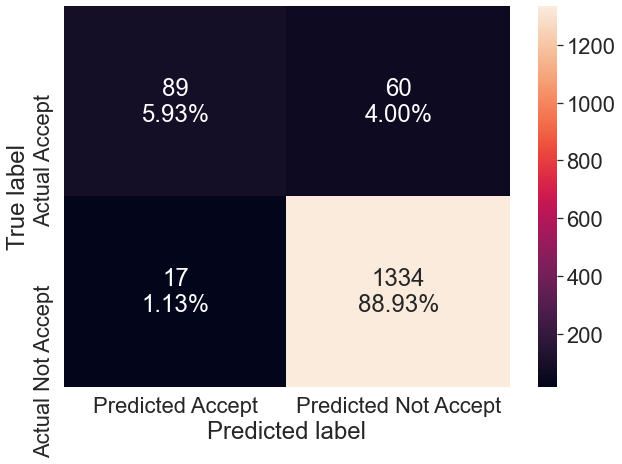

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [370]:
make_confusion_matrix(lg4, "stats", x_test4, y_test)

#### ROC-AUC  (Receiver Operating Charactistics - Area Under the Curve)

ROC-AUC helps visualize the performance of a classification model.  ROC is the probability curve and AUC measures the ability of a classifier to distinguish between classes or in this case, whether or not a customer accepts a personal loan. 

#### Training Data Set

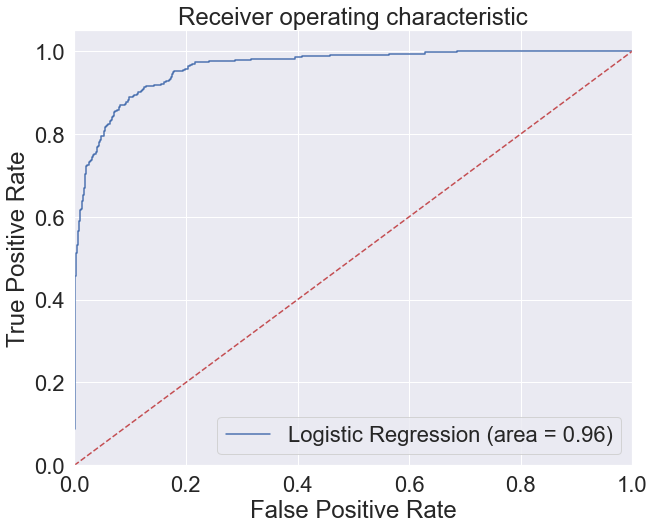

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [371]:
logit_roc_auc_train = roc_auc_score(y_train, lg4.predict(x_train4))
fpr, tpr, thresholds = roc_curve(y_train, lg4.predict(x_train4))
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### Testing Data Set

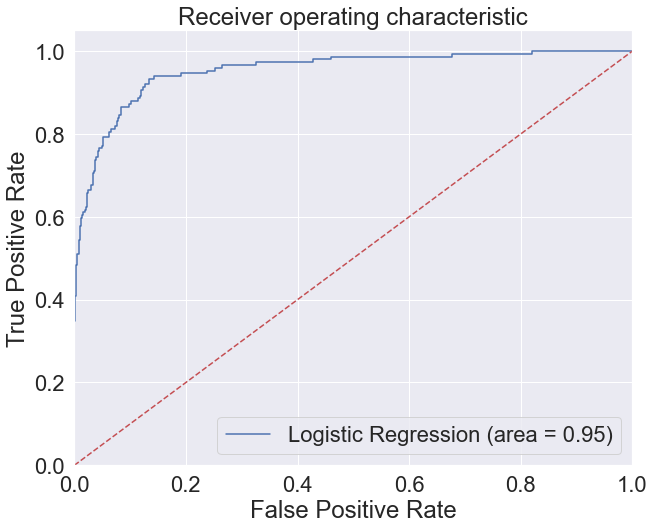

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [372]:
logit_roc_auc_train = roc_auc_score(y_test, lg4.predict(x_test4))
fpr, tpr, thresholds = roc_curve(y_test, lg4.predict(x_test4))
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

ROC-AUC ranges between 0.5 and 1.  The closer the metric is to 1 the better the model fits.  Therefore, because the ROC-AUC for the model 'lg4' is 0.96 on the training set and 0.95 on the testing set.  The model is a pretty good fit. 

The ROC-AUC curve can also be used to find an optimal threshold. This optimum threshold is the intersection of TPR (true positive rate - also known as Recall) and FPR (false positive rate- all false negatives divided by true negatives).  In this instance it would represent those customers who were not predicted to accept a loan but did, divided by all those customers who actually didn't accept a loan.

In [373]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg4.predict(x_test4))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(
    f"The optimal threshold according to the AUC-ROC curve is {optimal_threshold_auc_roc}"
)

The optimal threshold according to the AUC-ROC curve is 0.05385772914794727


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Next, generate a confusion matrix to see how the allocation has changed.

Confusion Matrix with AUC-ROC threshold


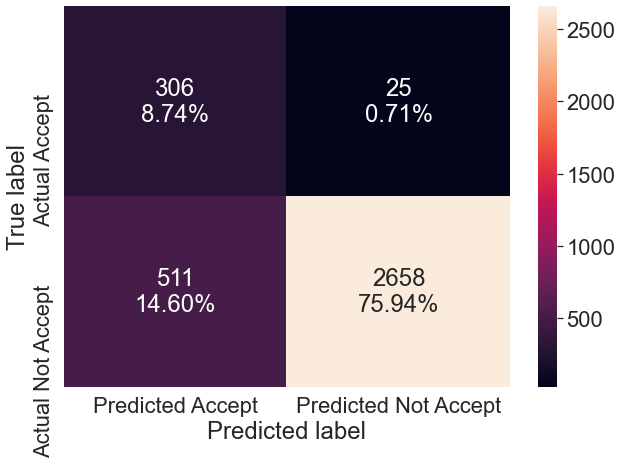

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [374]:
print("Confusion Matrix with AUC-ROC threshold")
make_confusion_matrix(
    lg4, "stats", x_train4, y_train, threshold=optimal_threshold_auc_roc
)

Confusion Matrix with Pre-set Threshold


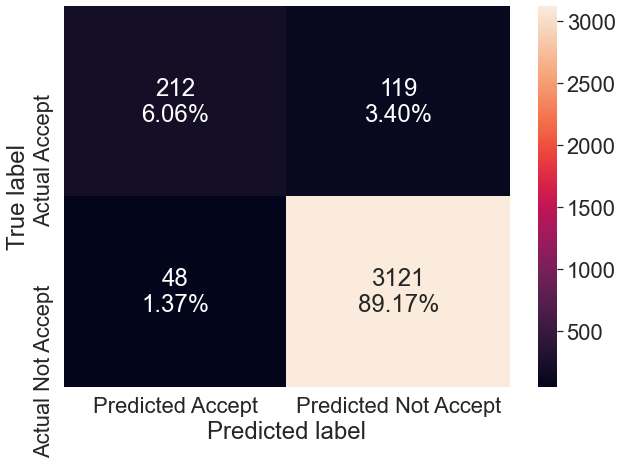

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [375]:
print("Confusion Matrix with Pre-set Threshold")
make_confusion_matrix(lg4, "stats", x_train4, y_train)

This threshold increases True Positives from 212 to 306 but decreases True Negatives from 3121 to 2658.  It also increases False Positives from 48 to 511 and decreases False Negatives from 119 to 25.


This new threshold should also be tested on the performance metrics.

In [475]:
print("\n")
print("***Performance Metrics with AUC-ROC Optimal Threshold***")
print("\n")
print("Training Data")
scores_lg4tr_opt = model_performance_classification_statsmodels(
    lg4, x_train4, y_train, threshold=optimal_threshold_auc_roc
)
print(scores_lg4tr_opt)
print("\n")
print("Testing Data")
print("\n")
scores_lg4ts_opt = model_performance_classification_statsmodels(
    lg4, x_test4, y_test, threshold=optimal_threshold_auc_roc
)
print(scores_lg4ts_opt)
print("\n")
print("***Performance Metrics with pre-set Threshold***")
print("\n")
print("Training Data")
scores_lg4 = model_performance_classification_statsmodels(lg4, x_train4, y_train)
print(scores_lg4)
print("\n")
print("Testing Data")
scores_lg4_test = model_performance_classification_statsmodels(lg4, x_test4, y_test)
print(scores_lg4_test)
print("\n")



***Performance Metrics with AUC-ROC Optimal Threshold***


Training Data
   Accuracy    Recall  Precision        F1
0  0.846857  0.924471   0.374541  0.533101


Testing Data


   Accuracy    Recall  Precision        F1
0  0.871333  0.926174    0.43125  0.588486


***Performance Metrics with pre-set Threshold***


Training Data
   Accuracy    Recall  Precision        F1
0  0.952286  0.640483   0.815385  0.717428


Testing Data
   Accuracy    Recall  Precision        F1
0  0.948667  0.597315   0.839623  0.698039




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The only performance metric that increased was Recall, all the others decreased. Precision decreased so much that it caused a somewhat significant decrease in F1. 


##### Next, try Precision -Recall curve to attempt to find an improved threshold.  This optimal threshold is where Precision and Recall intersect. 

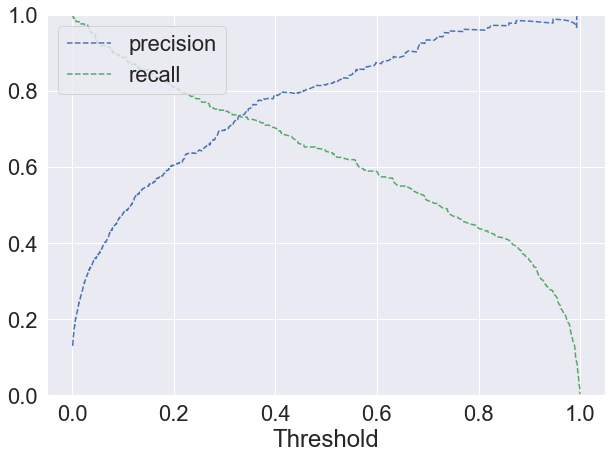

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [377]:
y_scores = lg4.predict(x_train4)
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

It appears that precision and recall intersect around .75.  Reducing that figure to .72 should provide higher recall and better precision.  Calculate the performance metrics again to compare.

In [378]:
opt_thresh_rpcurve = 0.72

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [477]:
print("\n")
print("***Performance Metrics with Precision-Recall Curve Optimal Threshold***")
print("\n")
print("Training Data")
scores_lg4tr_rp = model_performance_classification_statsmodels(
    lg4, x_train4, y_train, threshold=opt_thresh_rpcurve
)
print(scores_lg4tr_rp)
print("\n")
print("Testing Data")
print("\n")
scores_lg4ts_rp = model_performance_classification_statsmodels(
    lg4, x_test4, y_test, threshold=opt_thresh_rpcurve
)
print(scores_lg4ts_rp)
print("\n")
print("***Performance Metrics with pre-set Threshold***")
print("\n")
print("Training Data")
scores_lg4 = model_performance_classification_statsmodels(lg4, x_train4, y_train)
print(scores_lg4)
print("\n")
print("Testing Data")
scores_lg4_test = model_performance_classification_statsmodels(lg4, x_test4, y_test)
print(scores_lg4_test)
print("\n")



***Performance Metrics with Precision-Recall Curve Optimal Threshold***


Training Data
   Accuracy    Recall  Precision        F1
0  0.949714  0.498489   0.942857  0.652174


Testing Data


   Accuracy    Recall  Precision        F1
0  0.943333  0.449664   0.957143  0.611872


***Performance Metrics with pre-set Threshold***


Training Data
   Accuracy    Recall  Precision        F1
0  0.952286  0.640483   0.815385  0.717428


Testing Data
   Accuracy    Recall  Precision        F1
0  0.948667  0.597315   0.839623  0.698039




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

There is a sizeable increase in Precision, but decreases in all other metrics, including F1 due to the significant decrease in Recall. Next, compare Confusion Matrices. 

Confusion Matrix with Recall-Precision Curve threshold


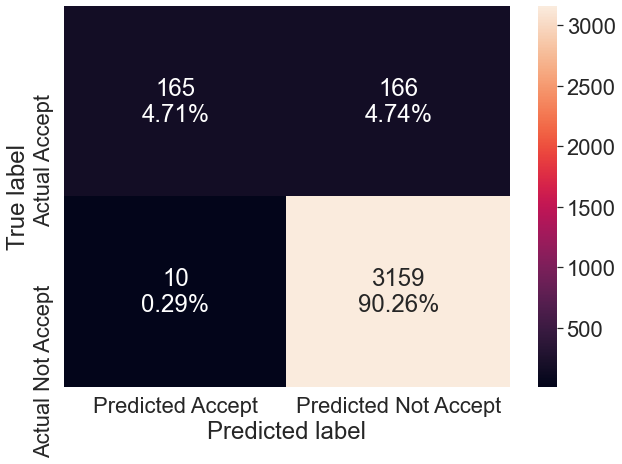

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [380]:
print("Confusion Matrix with Recall-Precision Curve threshold")
make_confusion_matrix(lg4, "stats", x_train4, y_train, threshold=opt_thresh_rpcurve)

Confusion Matrix with Pre-set Threshold


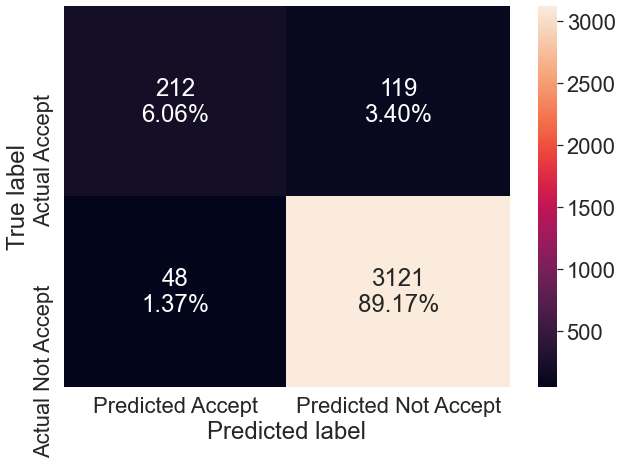

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [381]:
print("Confusion Matrix with Pre-set Threshold")
make_confusion_matrix(lg4, "stats", x_train4, y_train)

This threshold decreases True Positives from 212 to 165, but increases True Negatives from 3121 to 3159.  It also decreases False Positives from 48 to 10 and increases False Negatives from 119 to 166.


#### Model Performance Summary

In [484]:
# train performance comparison

logmodels_train_comp_df = pd.concat(
    [
        scores_lg4.T,
        scores_lg4tr_opt.T,
        scores_lg4tr_rp.T,
    ],
    axis=1,
)
logmodels_train_comp_df.columns = [
    "Logistic Regression SKlearn",
    "Logistic Regression ROC-AUC",
    "Logistic Regression Recall-Precision",
]
print("Test set performance comparison:")
logmodels_train_comp_df

Test set performance comparison:


Logistic Regression SKlearn  Logistic Regression ROC-AUC  \
Accuracy                      0.952286                     0.846857   
Recall                        0.640483                     0.924471   
Precision                     0.815385                     0.374541   
F1                            0.717428                     0.533101   

           Logistic Regression Recall-Precision  
Accuracy                               0.949714  
Recall                                 0.498489  
Precision                              0.942857  
F1                                     0.652174

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [483]:
# test performance comparison

logmodels_test_comp_df = pd.concat(
    [
        scores_lg4_test.T,
        scores_lg4ts_opt.T,
        scores_lg4ts_rp.T,
    ],
    axis=1,
)
logmodels_test_comp_df.columns = [
    "Logistic Regression SKlearn",
    "Logistic Regression ROC-AUC",
    "Logistic Regression Recall-Precision",
]
print("Test set performance comparison:")
logmodels_test_comp_df

Test set performance comparison:


Logistic Regression SKlearn  Logistic Regression ROC-AUC  \
Accuracy                      0.948667                     0.871333   
Recall                        0.597315                     0.926174   
Precision                     0.839623                     0.431250   
F1                            0.698039                     0.588486   

           Logistic Regression Recall-Precision  
Accuracy                               0.943333  
Recall                                 0.449664  
Precision                              0.957143  
F1                                     0.611872

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Overall, the Pre-set threshold of .50 used in the Logistic Regression SKlearn model is more suitable than either the AUC-ROC or the Recall-Precision Curve because the F1 value is higher.  Even though AUC-ROC increased Recall and Recall-Precision increased Precision.  Neither of these increases offset the decrease in Precision or Recall respectively to have a positive effect on the F1 score. While the F1 score for the logistic regression SKlearn model is the highests, it is still below 70%.  

##### Coefficient Interpretation

* The coefficients for 'Education', 'CD_Account' and 'Family' are positive, suggesting that customers with education, families and/or certificate of deposits with AllLife Bank are more inclined to accept a personal loans
* the coefficients for 'CreditCard' and 'Securities_Account' are negative, implying that customers with a credit card at another bank, or with a securities account with AllLife Bank are less likely to accept a personal loan. 

## Decision Tree Model

Decision trees create models that predicts the value of the target variable by using the independent features to assess simple decision rules. However, they can quickly become very complex by continuing to sort information by data rules and are easily overfit. Begin by generating a preliminary decision tree without using any parameters to control the assessment. 


In [384]:
# split data
# separate target variable from others
x1 = loan4.drop("Personal_Loan", axis=1)
y1 = loan4["Personal_Loan"]

# create dummy columns
x1 = pd.get_dummies(x, drop_first=True)

# adding constant
x1 = sm.add_constant(x)

# Split data in train and test sets
x1_train, x1_test, y1_train, y1_test = train_test_split(
    x1, y1, test_size=0.30, random_state=1
)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [413]:
# building model
dtree = DecisionTreeClassifier(criterion="gini", random_state=1)
dtree.fit(x1_train, y1_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Confusion Matrix and Performance Metrics

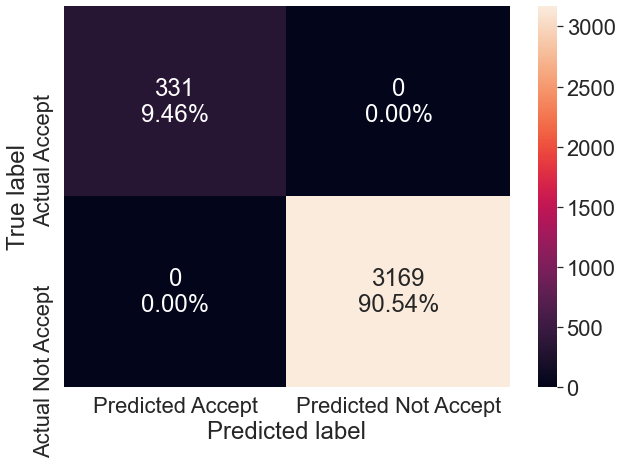

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [386]:
make_confusion_matrix(dtree, "sklearn", x1_train, y1_train)

Because the decision tree was permitted to extend fully and become complex enough to perfectly predict which individuals did and did not accept a personal loan.  Reviewing performance metrics for both the training and testing data will provide insight in to potential overfitting. 

In [387]:
print("\n\n")
print("Training Data")
scores_dtreeTr = model_performance_classification_statsmodels(dtree, x1_train, y1_train)
print(scores_dtreeTr)
print("\n")
print("Testing Data")
print("\n")
scores_dtreeTs = model_performance_classification_statsmodels(dtree, x1_test, y1_test)
print(scores_dtreeTs)
print("\n")




Training Data
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


Testing Data


   Accuracy    Recall  Precision        F1
0      0.98  0.872483   0.921986  0.896552




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All the training data Performance Metrics are equal to 1.  This was to be expected because the model was perfectly fit down to the last significant node to accommodate the training data.  The test data is not fit quite as well. 

### Visualize the Decision Tree

In [388]:
feature_names = list(x1.columns)
print(feature_names)

['const', 'Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'county_Contra Costa County', 'county_County-Other', 'county_Fresno County', 'county_Humboldt County', 'county_Kern County', 'county_Los Angeles County', 'county_Marin County', 'county_Monterey County', 'county_Orange County', 'county_Placer County', 'county_Riverside County', 'county_Sacramento County', 'county_San Bernardino County', 'county_San Diego County', 'county_San Francisco County', 'county_San Luis Obispo County', 'county_San Mateo County', 'county_Santa Barbara County', 'county_Santa Clara County', 'county_Santa Cruz County', 'county_Solano County', 'county_Sonoma County', 'county_Ventura County', 'county_Yolo County']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

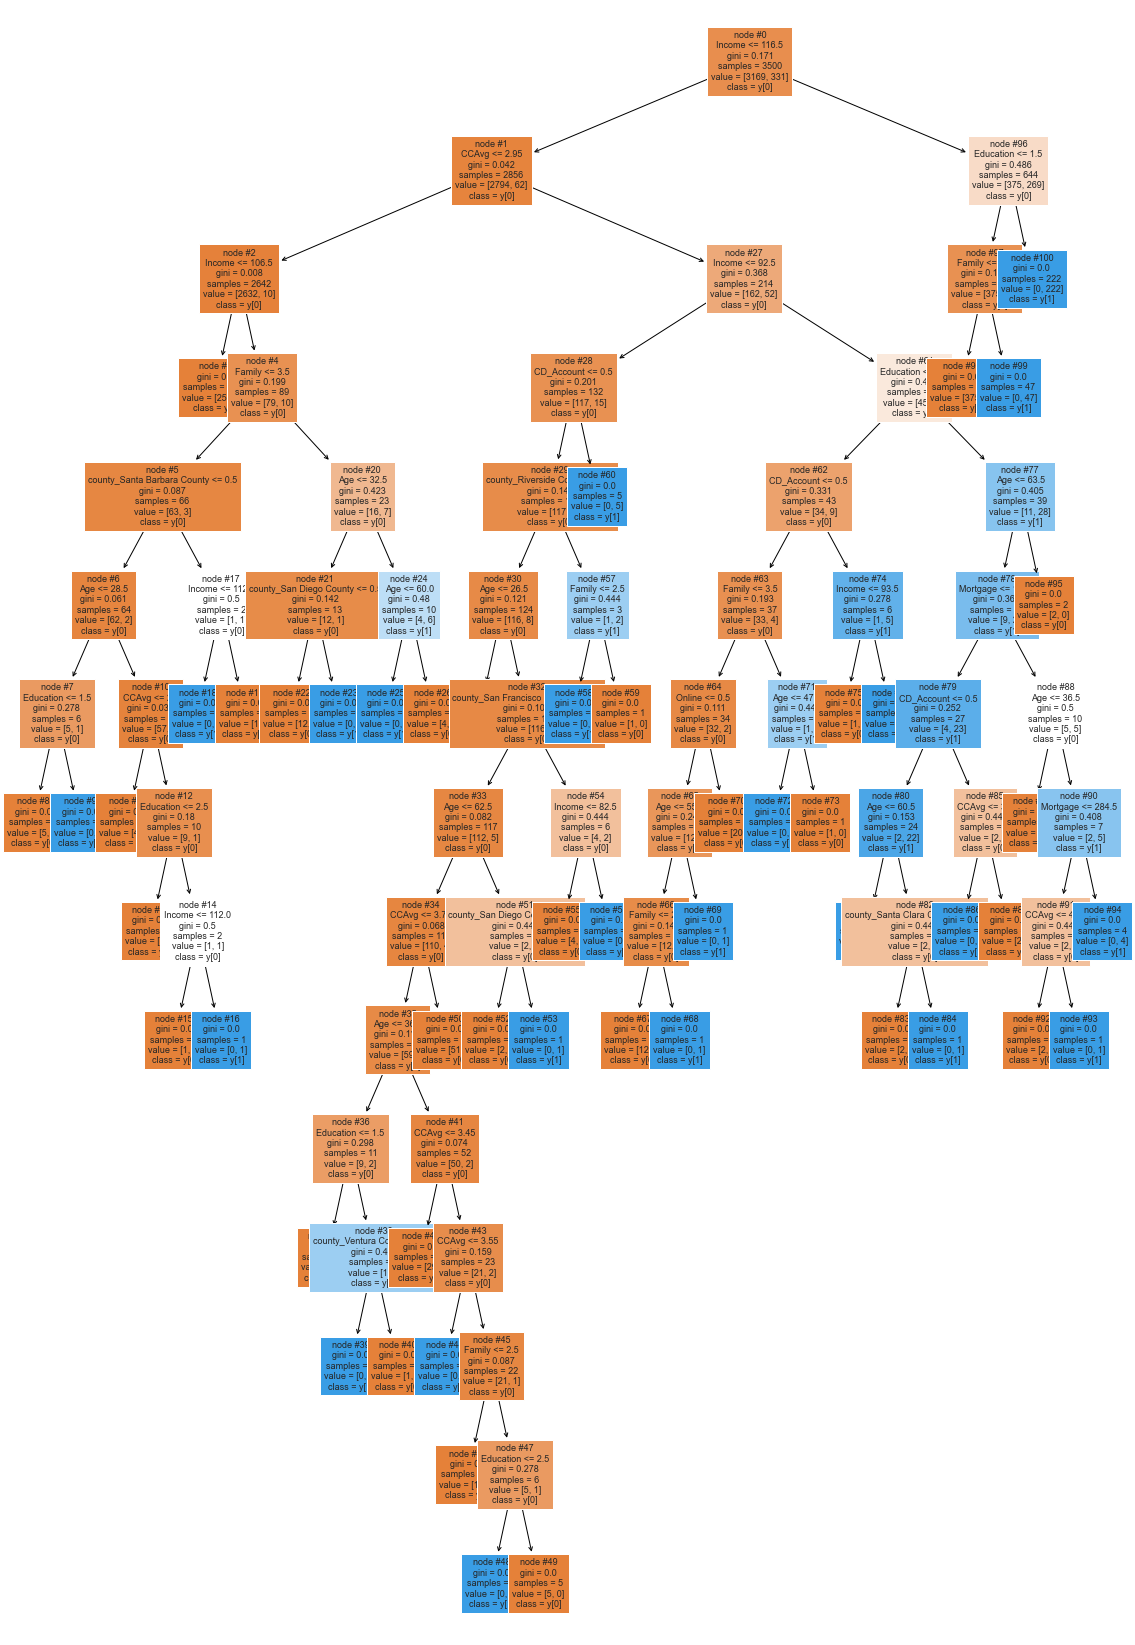

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [389]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [390]:
# text report showing decision tree rules
print(tree.export_text(dtree, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- county_Santa Barbara County <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education >  1.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education <= 2.50
|   |   |   |   |   |   |   |   |--- weights: [8.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education >  2.50
|   |   |   |   |   |   |   |   |--- Income <= 112.00
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   | 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

From visualizing the decision tree, it is clear the tree is rather complex.

#### Feature Importance

Next, calculate the Gini Importance.  Gini Importance calculates the importance of each feature by adding up the number of splits that include the feature and then divides it by the total number of nodes.

In [391]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature.
# It is also known as the Gini importance )

print(
    pd.DataFrame(
        dtree.feature_importances_, columns=["Imp"], index=x1_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Education                      0.411083
Income                         0.308382
Family                         0.152281
CCAvg                          0.046132
Age                            0.033965
CD_Account                     0.025711
Mortgage                       0.005557
county_San Diego County        0.005305
county_Riverside County        0.003544
county_Ventura County          0.002224
county_Santa Clara County      0.002224
county_San Francisco County    0.001608
county_Santa Barbara County    0.001422
Online                         0.000561
county_San Luis Obispo County  0.000000
county_San Bernardino County   0.000000
const                          0.000000
county_San Mateo County        0.000000
county_Santa Cruz County       0.000000
county_Sacramento County       0.000000
county_Sonoma County           0.000000
county_Solano County           0.000000
county_Marin County            0.000000
county_Placer County           0.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

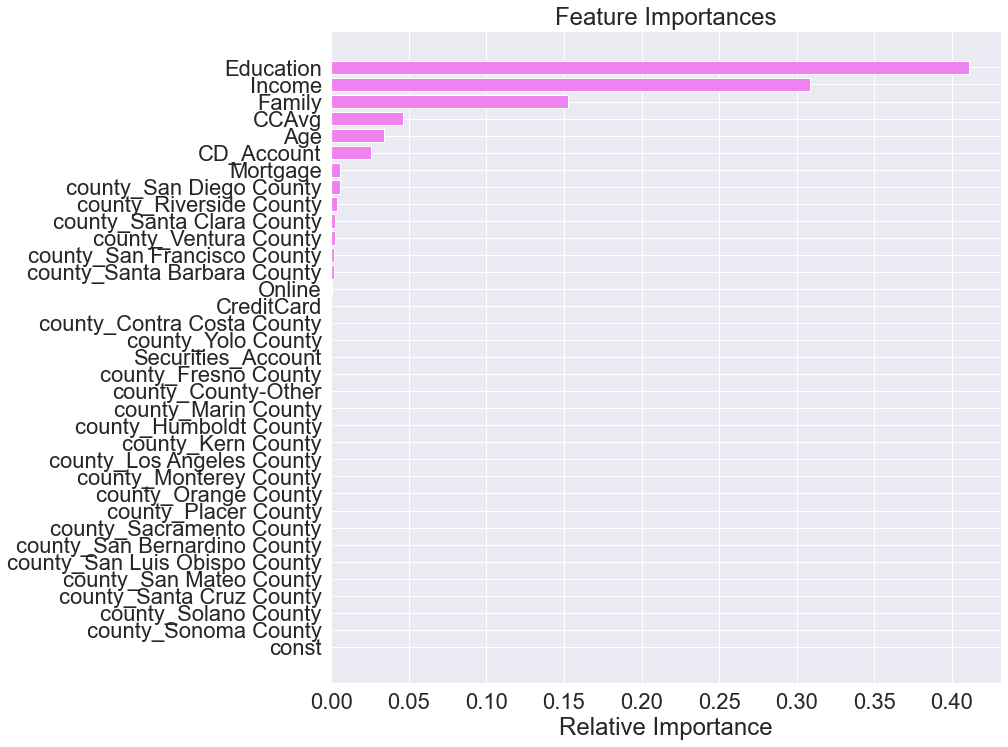

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [392]:
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Education, Income and Family size are the most important features of this model.  There are an additional 11 features with a lesser level of significance.  These include: credit card averages, age, whether or not a customer has a CD account, mortgage, use of online services and some, but not all geographic locations. However, this is a very complex model.  Generate a new model with a maximum depth of 4.

#### Reducing Overfitting by decreasing the depth by randomly selected depth of 4

In [437]:
dtree1 = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=1)
dtree1.fit(x1_train, y1_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Confusion Matric and Performance Metrics

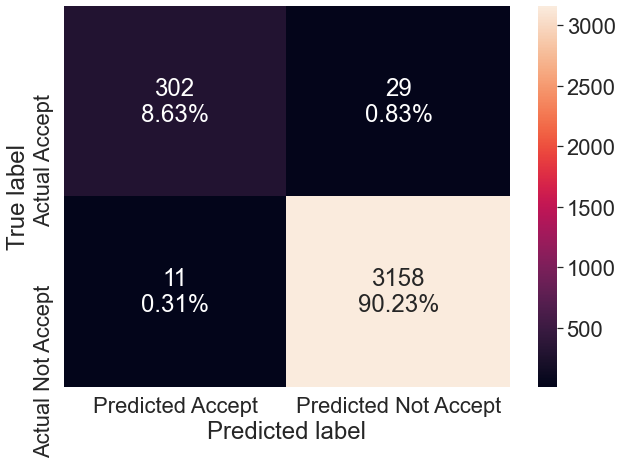

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [438]:
make_confusion_matrix(dtree1, "sklearn", x1_train, y1_train)

In [439]:
print("\n\n")
print("Training Data")
scores_dtree1Tr = model_performance_classification_statsmodels(
    dtree1, x1_train, y1_train
)
print(scores_dtree1Tr)
print("\n")
print("Testing Data")
print("\n")
scores_dtree1Ts = model_performance_classification_statsmodels(dtree1, x1_test, y1_test)
print(scores_dtree1Ts)
print("\n")




Training Data
   Accuracy    Recall  Precision        F1
0  0.988571  0.912387   0.964856  0.937888


Testing Data


   Accuracy    Recall  Precision        F1
0  0.981333  0.865772   0.941606  0.902098




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

While the Confusion Matrix now shows some False Positives and Negatives, the Performance Metrics are moving closer together.  All the metrics for the training data is still at 91% or above while the metrics for the testing data is still 3 or more points below, with the exception of accuracy. 

##### Visualize Decision Tree

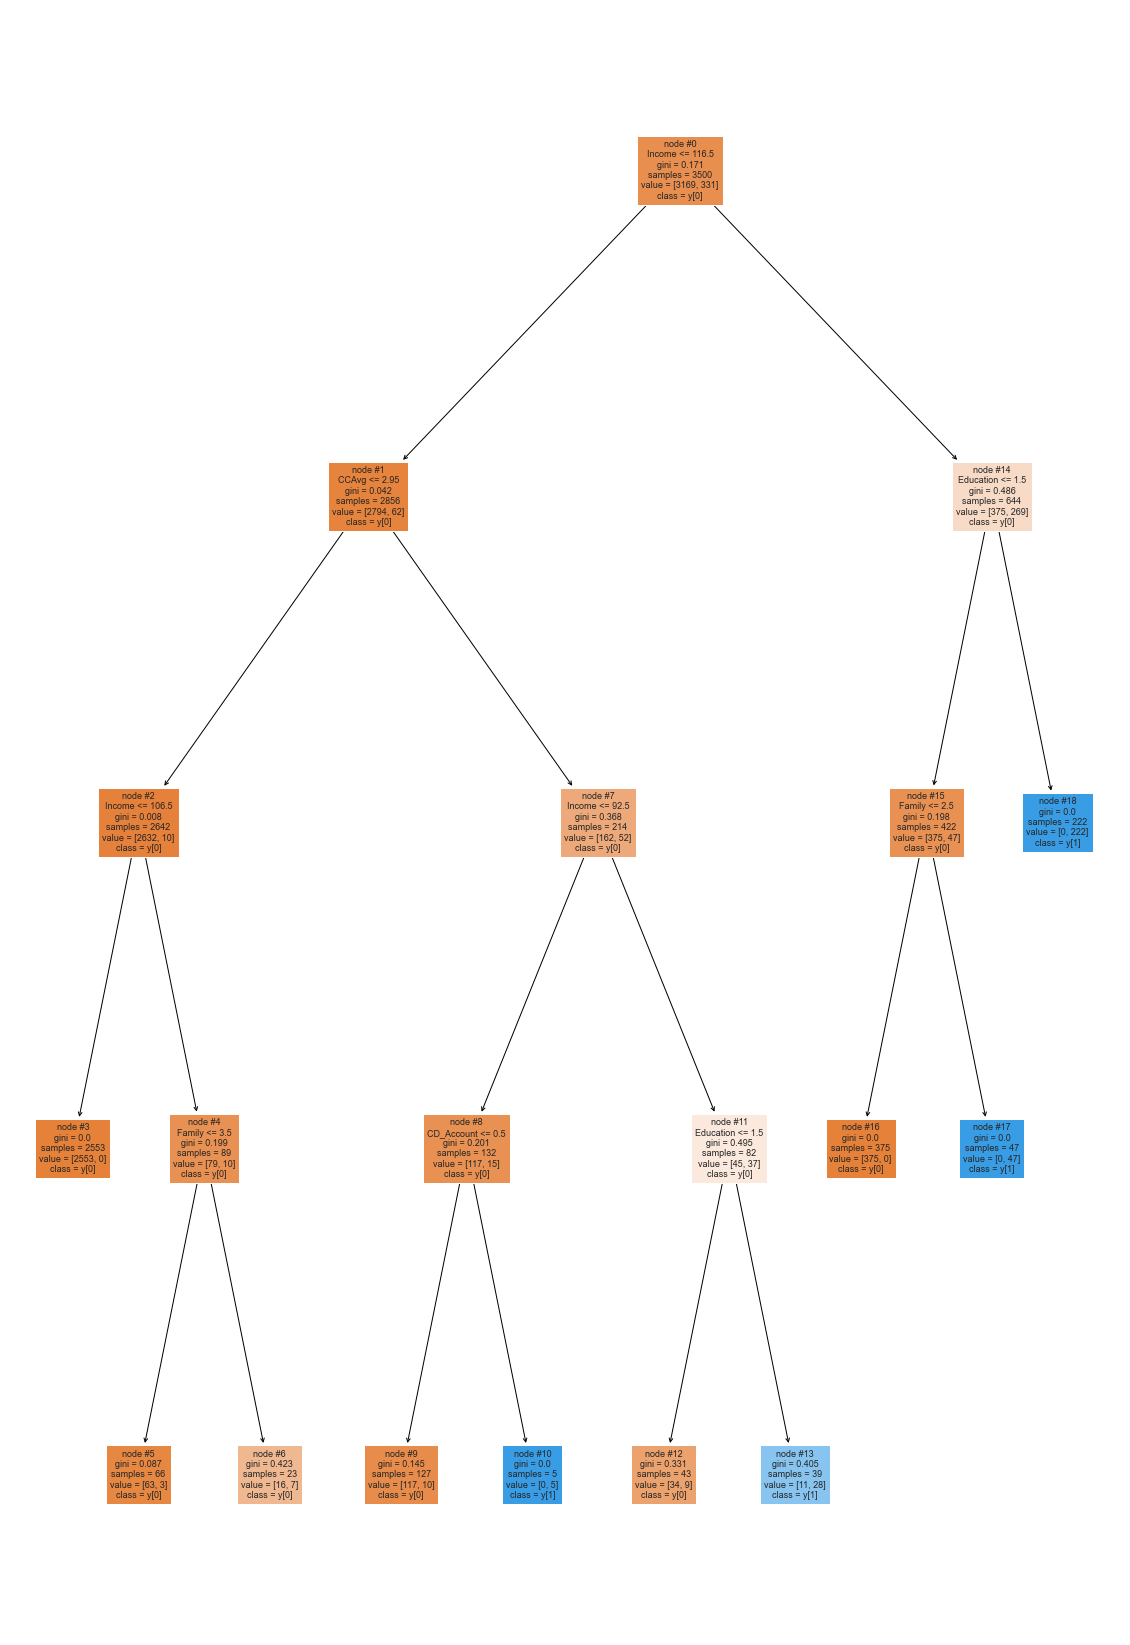

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [425]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    dtree1,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [426]:
print(tree.export_text(dtree1, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- weights: [16.00, 7.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- weights: [34.00, 9.00] class: 0
|   |   |   |--- Education >  1.50
|   |   |   |   |--- weights: [11.00, 28.00] class: 1
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |--- Education >  1.50
|   | 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visually, the decision tree is much easier to review. 

##### Feature Importance

In [427]:
print(
    pd.DataFrame(
        dtree1.feature_importances_, columns=["Imp"], index=x1_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Education                      0.448813
Income                         0.333366
Family                         0.160264
CCAvg                          0.042308
CD_Account                     0.015249
const                          0.000000
county_San Mateo County        0.000000
county_Sacramento County       0.000000
county_San Bernardino County   0.000000
county_San Diego County        0.000000
county_San Francisco County    0.000000
county_San Luis Obispo County  0.000000
county_Santa Cruz County       0.000000
county_Santa Barbara County    0.000000
county_Santa Clara County      0.000000
county_Placer County           0.000000
county_Solano County           0.000000
county_Sonoma County           0.000000
county_Ventura County          0.000000
county_Riverside County        0.000000
county_Marin County            0.000000
county_Orange County           0.000000
county_Monterey County         0.000000
Age                            0.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

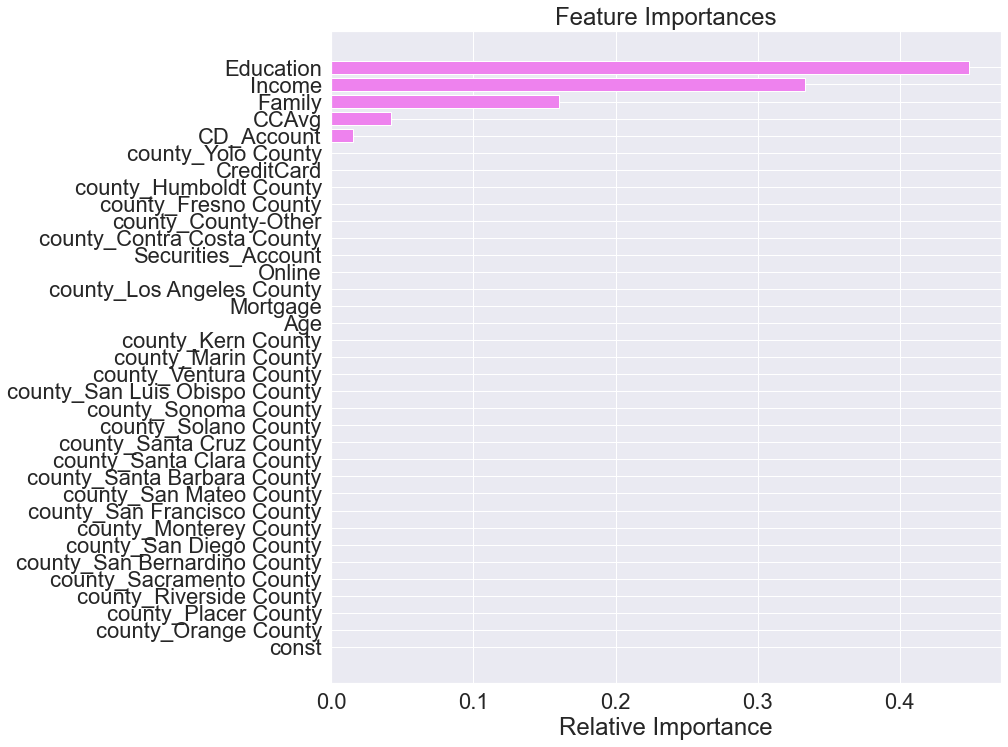

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [428]:
importances = dtree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important features with a randomly selected maximum depth of 4 is still Education and Income.  

### Hyperparameter Tuning Using GridSearch

Next use GridSearch for automated hyperparameter tuning.  This model runs thru a wider selection of pre-defined parameters and selects the best fitting model based of the array of parameters. 

In [421]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "max_depth": np.arange(1, 10),
    "min_samples_leaf": [1, 2, 5, 7, 10, 15, 20],
    "max_leaf_nodes": [2, 3, 5, 10],
    "min_impurity_decrease": [0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(x1_train, y1_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x1_train, y1_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.001, random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Confusion Matrix and Performance Metrics

The GridSearch determined that the best fitting decision tree would have a depth of 5 with a maximum of 10 leaf nodes. Generate a Confusion Matrix and Performance Metrics to compare fit to other models

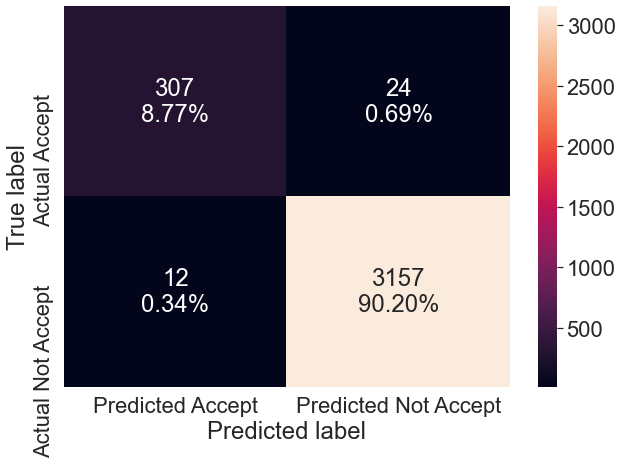

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [435]:
make_confusion_matrix(estimator, "sklearn", x1_train, y1_train)

In [440]:
print("\n\n")
print("Training Data")
scores_estimatorTr = model_performance_classification_statsmodels(
    estimator, x1_train, y1_train
)
print(scores_estimatorTr)
print("\n")
print("Testing Data")
print("\n")
scores_estimatorTs = model_performance_classification_statsmodels(
    estimator, x1_test, y1_test
)
print(scores_estimatorTs)
print("\n")




Training Data
   Accuracy    Recall  Precision        F1
0  0.989714  0.927492   0.962382  0.944615


Testing Data


   Accuracy    Recall  Precision        F1
0  0.981333  0.879195   0.929078  0.903448




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The False Negative has decreased by increasing the depth to 5 while the False Negative increased on the Confusion Matrix. For the Performance Metrics, Accuracy was fairly consistent, Recall dropped for both the training and test data sets, precision increase very slightly on the training data but more so on the testing data. F1 increased slightly on both the training and testing data sets, more on training than data. 

##### Visualizing the Decision Tree

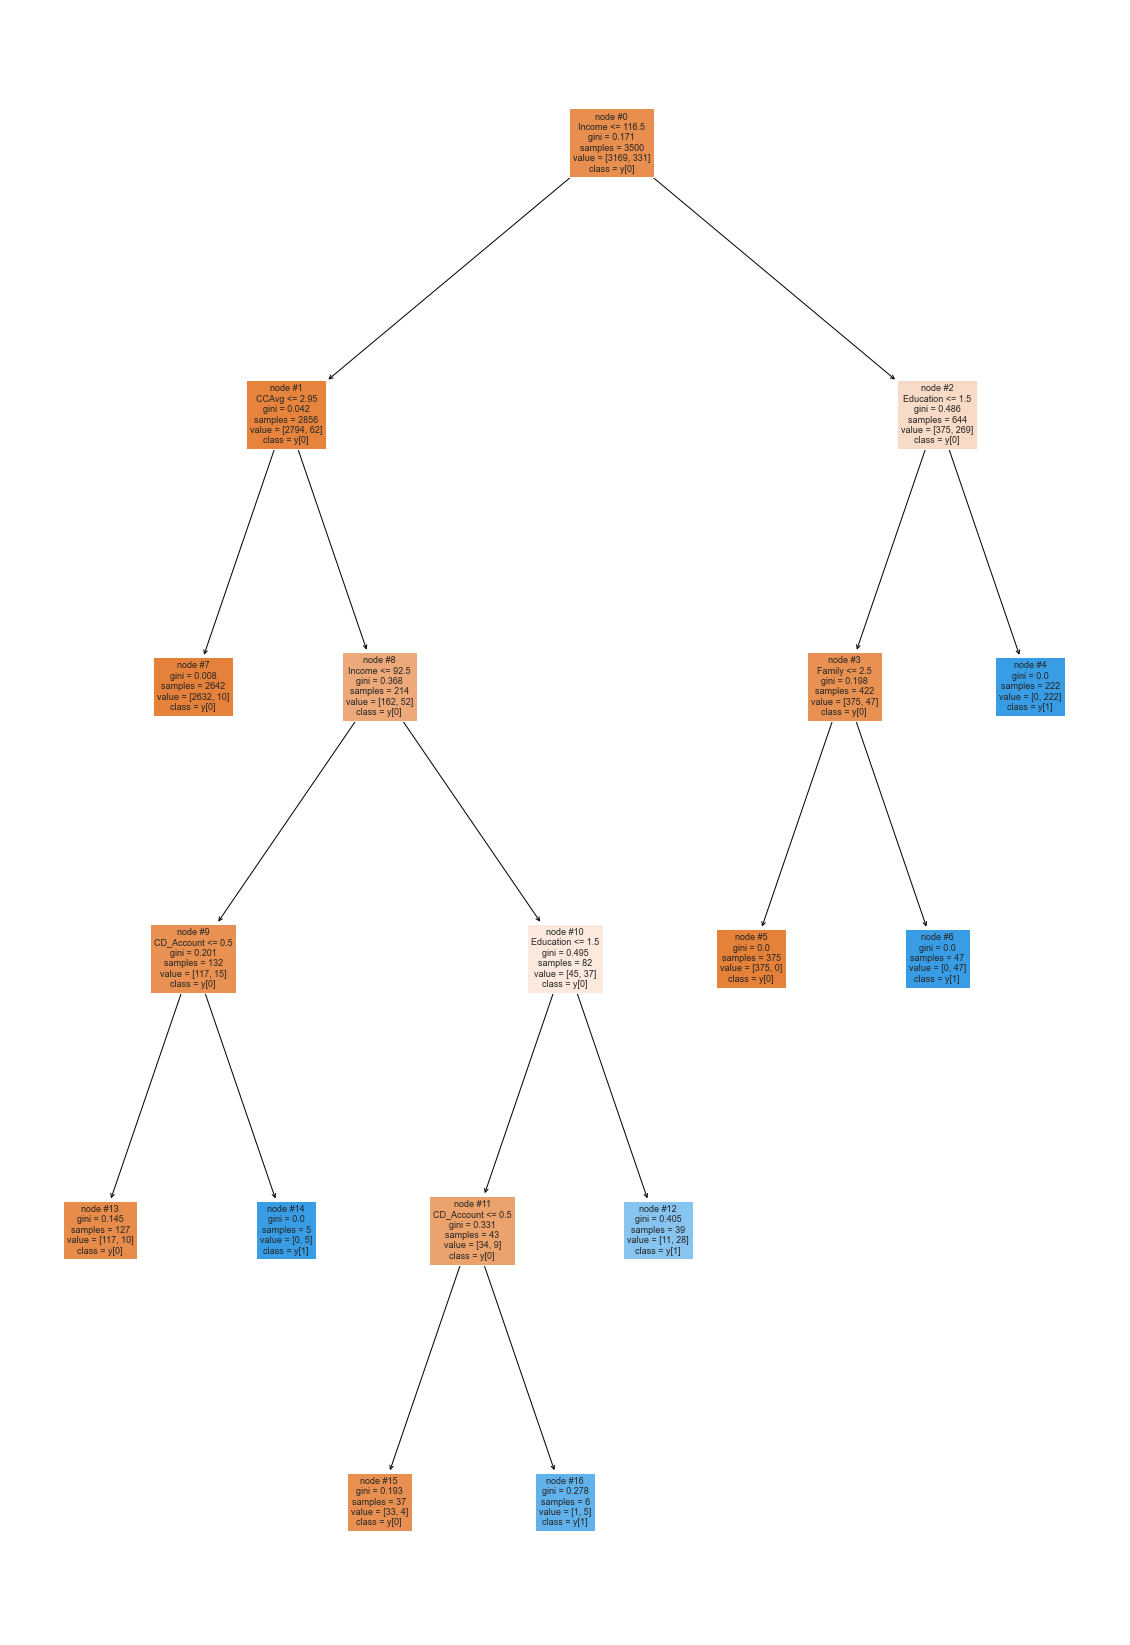

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [441]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [442]:
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   |   |--- CD_Account >  0.50
|   |   |   |   |   |--- weights: [1.00, 5.00] class: 1
|   |   |   |--- Education >  1.50
|   |   |   |   |--- weights: [11.00, 28.00] class: 1
|--- Income >  116.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1
|   |--- Education >  1.50
|   |   |--- weights: [0.00, 222.00] class: 1



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Again, visually the decision tree is much easier to review and comprehend, although differently dispersed than randomly selected a depth of 4. 

##### Feature Importance

In [409]:
print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=x1_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Education                      0.447999
Income                         0.328713
Family                         0.155711
CCAvg                          0.042231
CD_Account                     0.025345
const                          0.000000
county_San Mateo County        0.000000
county_Sacramento County       0.000000
county_San Bernardino County   0.000000
county_San Diego County        0.000000
county_San Francisco County    0.000000
county_San Luis Obispo County  0.000000
county_Santa Cruz County       0.000000
county_Santa Barbara County    0.000000
county_Santa Clara County      0.000000
county_Placer County           0.000000
county_Solano County           0.000000
county_Sonoma County           0.000000
county_Ventura County          0.000000
county_Riverside County        0.000000
county_Marin County            0.000000
county_Orange County           0.000000
county_Monterey County         0.000000
Age                            0.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

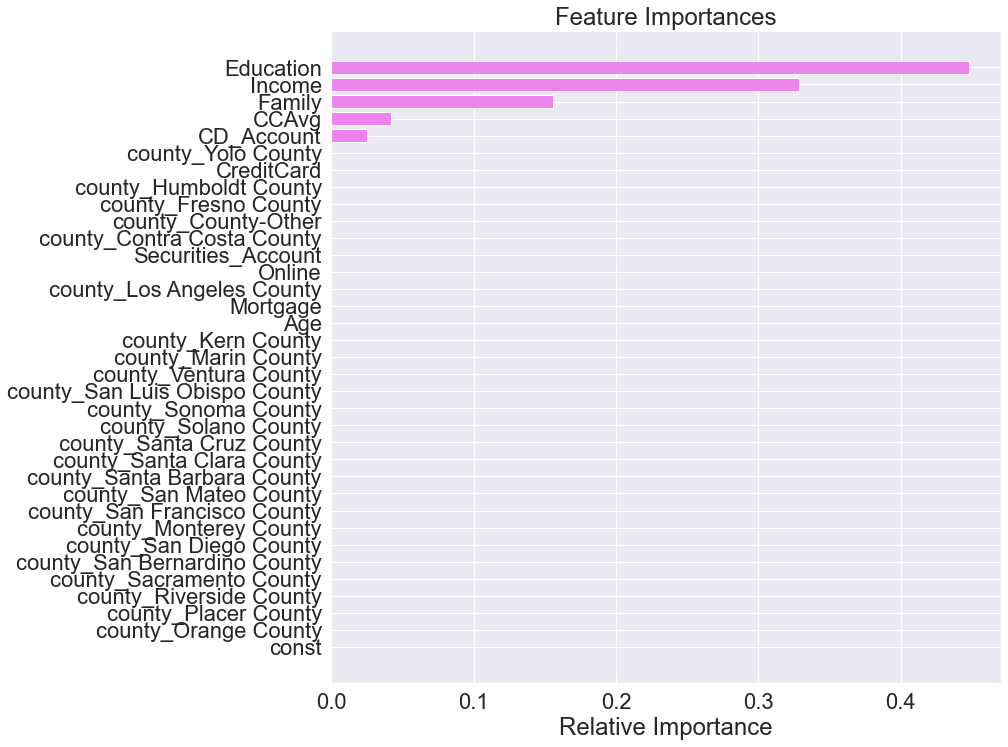

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [410]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important features after pre-pruning with hyperparameters are once again, Education and Income, followed by family size, monthly average credit card spending and ownership of CD accounts. 

### Cost Complexity Pruning

Another option to control the size of a decision tree is cost complexity pruning. This method first extends the tree as large as possible then examines each individual node to determine the most efficient tree and then 'prunes' those nodes that don't support that efficiency.  The cost complexity paramter metric that is used is ccp_alpha.  The higher the alpha, the more nodes are pruned.  The nodes with the highest ccp_alpha are pruned first to increase efficiency.  These nodes have the least influence on the the final model.

In [443]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(x1_train, y1_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [444]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000187    0.000562
2     0.000269    0.001636
3     0.000273    0.002182
4     0.000274    0.004371
5     0.000359    0.005447
6     0.000381    0.005828
7     0.000381    0.006209
8     0.000381    0.006590
9     0.000381    0.006971
10    0.000381    0.007352
11    0.000435    0.007787
12    0.000476    0.008263
13    0.000514    0.009805
14    0.000527    0.010332
15    0.000578    0.012646
16    0.000582    0.013228
17    0.000607    0.013835
18    0.000621    0.014456
19    0.000882    0.017985
20    0.001552    0.019536
21    0.002333    0.021869
22    0.003024    0.024893
23    0.003294    0.028187
24    0.006473    0.034659
25    0.023866    0.058525
26    0.056365    0.171255

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Impurity Vs. Effective Alpha

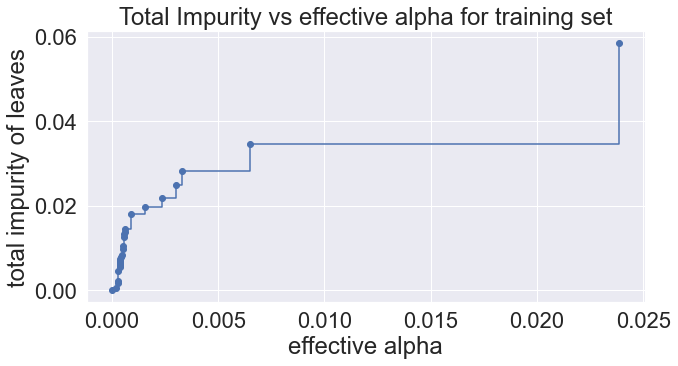

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [445]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Because the most effective alpha for the training set is approximately 0.024 the decision tree needs to trim one node. Make the last node a separate tree to determine the significance of it's alpha.   

In [448]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x1_train, y1_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 5 with ccp_alpha: 0.02386594448205822


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The alpha for the last tree is 0.0239, which coincides with the above graph. There is only one node with an alpha greater than 0.0239, therefore it is necessary to remove the node from the tree.

Next, review how depth and number of nodes change as alpha changes.

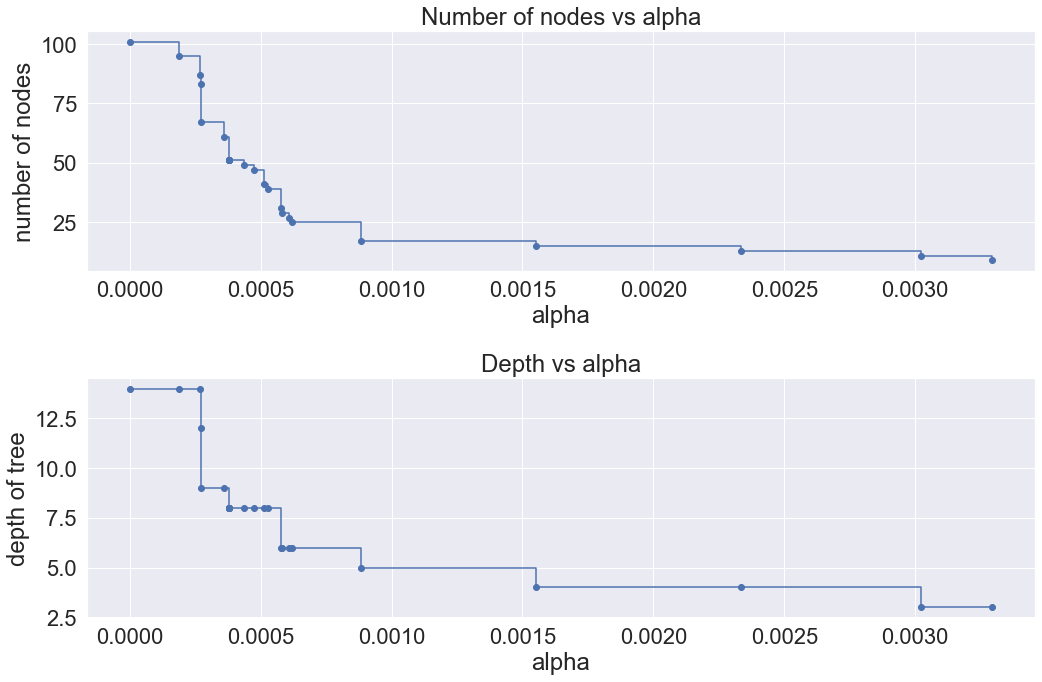

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [450]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Notice, as the number and depth of nodes decrease, the alpha increases.  

#### Performance Metrics Vs. Alpha for Training and Testing Data Sets

Review all the metrics with alpha = 0.

In [451]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(x1_train, y1_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [452]:
print("\n\n")
print("Training Data")
scores_treeTr = model_performance_classification_statsmodels(tree, x1_train, y1_train)
print(scores_treeTr)
print("\n")
print("Testing Data")
print("\n")
scores_treeTs = model_performance_classification_statsmodels(tree, x1_test, y1_test)
print(scores_treeTs)
print("\n")




Training Data
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


Testing Data


   Accuracy    Recall  Precision        F1
0      0.98  0.872483   0.921986  0.896552




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

All the performance metrics are equal to 1 for the training set because the decision tree has been essentially fit perfectly to it.  However, on the testing data, the metrics are not quite so 'perfect'.  Accuracy is very close, however it has already been established that because of the lack of equality with the class distribution, Accuracy is not the best metric to assess, instead F1, which is a weighted average of Recall and Precision, is a by far better measurement. 

In [453]:
train_scores = [clf.score(x1_train, y1_train) for clf in clfs]
test_scores = [clf.score(x1_test, y1_test) for clf in clfs]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

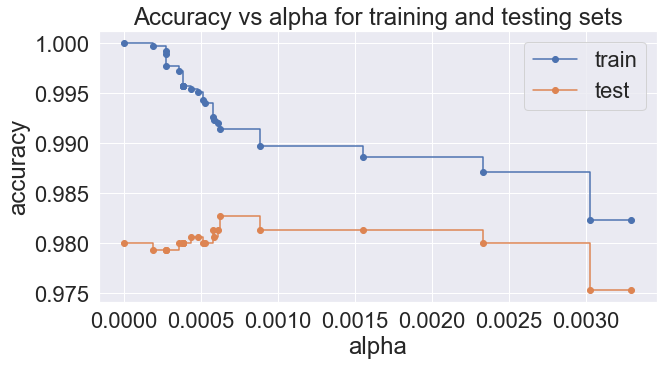

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [454]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [455]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print("Training accuracy of best model: ", best_model.score(x_train, y_train))
print("Test accuracy of best model: ", best_model.score(x_test, y_test))

DecisionTreeClassifier(ccp_alpha=0.0006209286209286216, random_state=1)
Training accuracy of best model:  0.9914285714285714
Test accuracy of best model:  0.9826666666666667


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [456]:
recall_train = []
for clf in clfs:
    pred_train3 = clf.predict(x_train)
    values_train = metrics.recall_score(y_train, pred_train3)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [457]:
recall_test = []
for clf in clfs:
    pred_test3 = clf.predict(x_test)
    values_test = metrics.recall_score(y_test, pred_test3)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

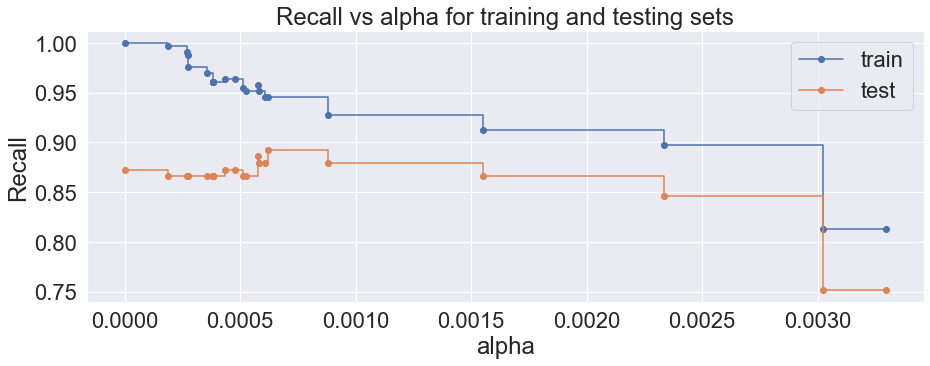

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [458]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [459]:
f1_train = []
for clf in clfs:
    pred_train4 = clf.predict(x_train)
    values_train = metrics.f1_score(y_train, pred_train4)
    f1_train.append(values_train)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [460]:
f1_test = []
for clf in clfs:
    pred_test4 = clf.predict(x_test)
    values_test = metrics.f1_score(y_test, pred_test4)
    f1_test.append(values_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

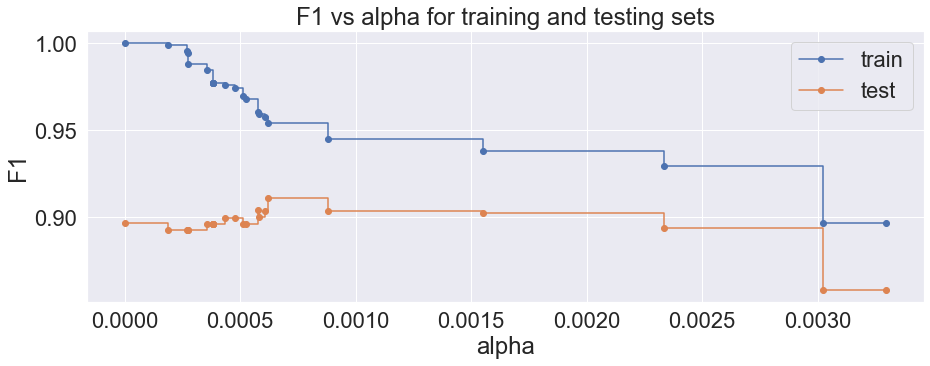

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [461]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1")
ax.set_title("F1 vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [462]:
precision_train = []
for clf in clfs:
    pred_train5 = clf.predict(x_train)
    values_train = metrics.precision_score(y_train, pred_train5)
    precision_train.append(values_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [463]:
precision_test = []
for clf in clfs:
    pred_test5 = clf.predict(x_test)
    values_test = metrics.precision_score(y_test, pred_test5)
    precision_test.append(values_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

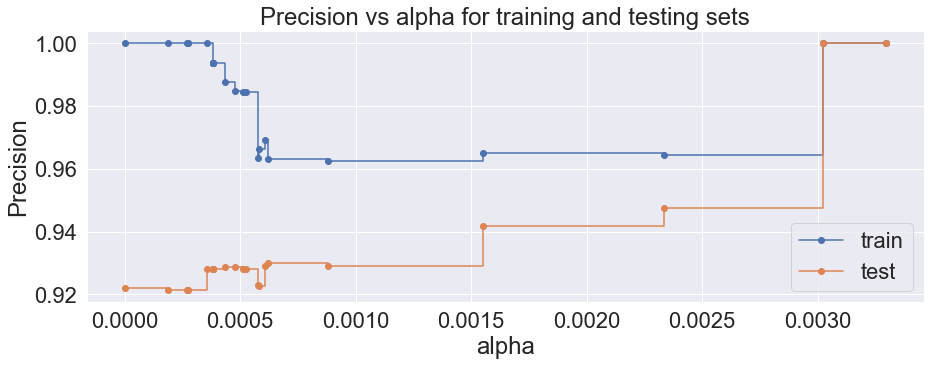

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [464]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Precision")
ax.set_title("Precision vs alpha for training and testing sets")
ax.plot(ccp_alphas, precision_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, precision_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

While the 'best model' scenario gives an alpha of 0.00062, comparing the performance metrics on both the training and testing sets, it appears a more likely best fit is 0.003.  Therefore it is necessary to generate models and compare metrics with both alphas.

##### Build Models

In [289]:
bestmodel = DecisionTreeClassifier(ccp_alpha=0.00062, random_state=1)
bestmodel.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.00062, random_state=1)

<IPython.core.display.Javascript object>

In [290]:
bestmetric = DecisionTreeClassifier(ccp_alpha=0.003, random_state=1)
bestmetric.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.003, random_state=1)

<IPython.core.display.Javascript object>

In [465]:
print("\n\n")
print("Training Data")
scores_bestmodelTr = model_performance_classification_statsmodels(
    bestmodel, x1_train, y1_train
)
print(scores_bestmodelTr)
print("\n")
print("Testing Data")
print("\n")
scores_bestmodelTs = model_performance_classification_statsmodels(
    bestmodel, x1_test, y1_test
)
print(scores_bestmodelTs)
print("\n")




Training Data
   Accuracy    Recall  Precision        F1
0     0.992  0.945619    0.96904  0.957187


Testing Data


   Accuracy    Recall  Precision        F1
0  0.981333  0.879195   0.929078  0.903448




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [466]:
print("\n\n")
print("Training Data")
scores_bestmetricTr = model_performance_classification_statsmodels(
    bestmetric, x1_train, y1_train
)
print(scores_bestmetricTr)
print("\n")
print("Testing Data")
print("\n")
scores_bestmetricTs = model_performance_classification_statsmodels(
    bestmetric, x1_test, y1_test
)
print(scores_bestmetricTs)
print("\n")




Training Data
   Accuracy    Recall  Precision        F1
0  0.987143  0.897281   0.964286  0.929577


Testing Data


   Accuracy    Recall  Precision        F1
0      0.98  0.845638   0.947368  0.893617




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

After generating the models based on the different alphas, Accuracy is slightly higher with the 'bestmodel' scenario.  Recall is lower on the 'bestmetric' scenario, but Precision is higher.  The F1 scores are very close however, still slightly better with the 'bestmodel' scenario. Next, run the confusion matrix on both models to see how well they fit with True Positives and Negatives.

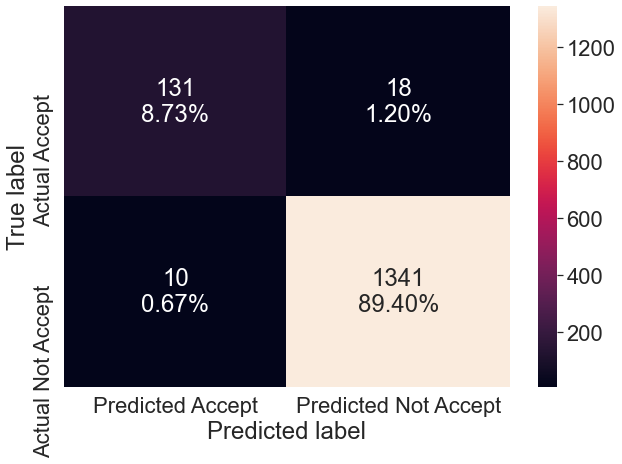

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [467]:
make_confusion_matrix(bestmodel, "sklearn", x1_test, y1_test)

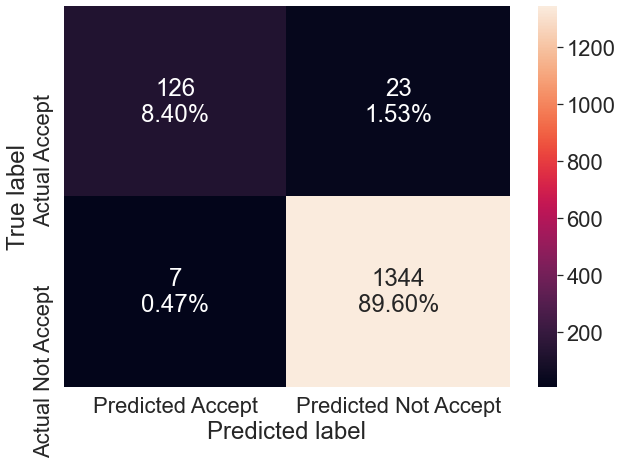

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [468]:
make_confusion_matrix(bestmetric, "sklearn", x1_test, y1_test)

True Positives are slightly greater under the 'bestmodel' scenario, but True Negatives are slightly less. False Negatives, the identifier that can be the most problematic, is less in the 'bestmodel' scenario than the 'bestmetric' scenario, therefore it is most advantagous to use the 'bestmodel' scenario based on both Precision metrics and the Confusion Matrix. 

### Visualize the Decision Tree

Based on the analysis of both the Confusion Matrices and Performance Metrics, the 'bestmodel' model is better than the 'bestmetric' model for cost complexity pruning, and only the 'bestmodel' model is visualized. 

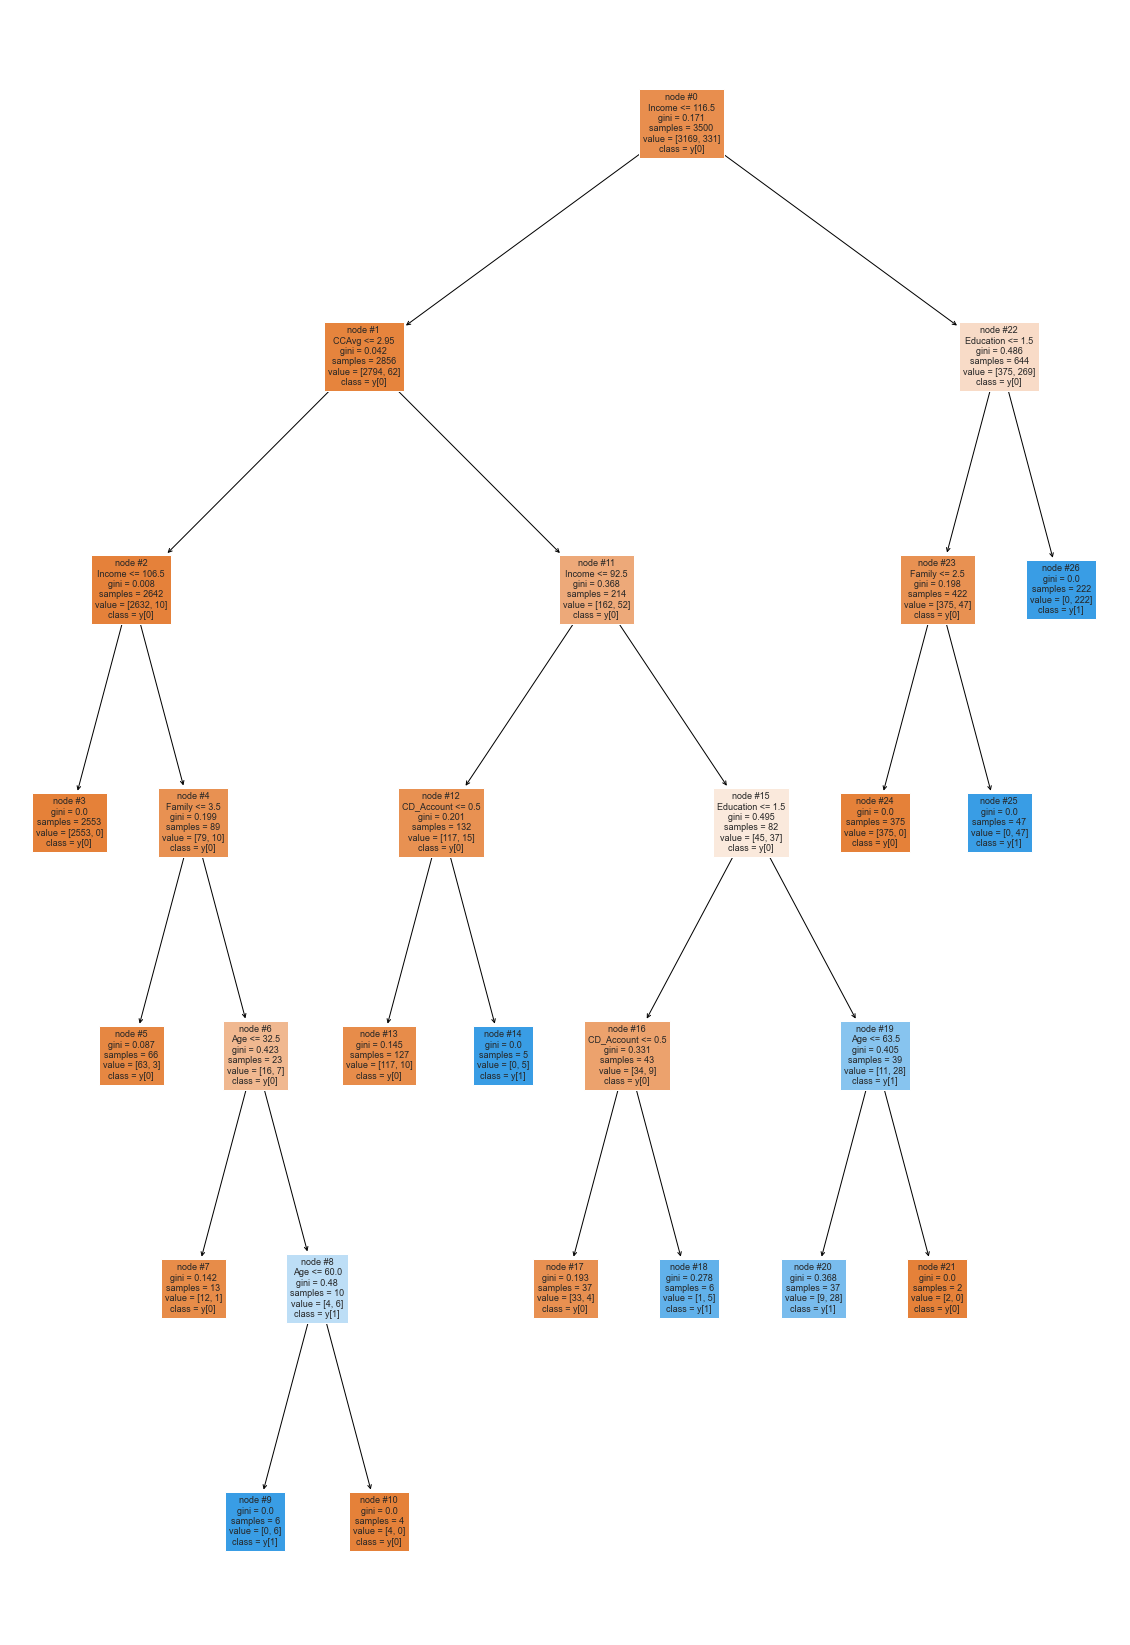

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [471]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    bestmodel,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [472]:
textrep = tree.export_text(best_model, feature_names=feature_names, show_weights=True)
print(textrep)

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 32.50
|   |   |   |   |   |--- weights: [12.00, 1.00] class: 0
|   |   |   |   |--- Age >  32.50
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- weights: [0.00, 6.00] class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [117.00, 10.00] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- weights: [0.00, 5.00] class: 1
|   |   |--- Income >  92.50
|   |   |   |--- Education <= 1.50
|   |   |   |   |--- CD_Account <= 0.50
|   |   |   |   |   |--- weights: [33.00, 4.00] class: 0
|   |   |   | 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Feature Importance

In [473]:
print(
    pd.DataFrame(
        bestmodel.feature_importances_, columns=["Imp"], index=x1_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                    Imp
Education                      0.436189
Income                         0.323989
Family                         0.155756
CCAvg                          0.041118
CD_Account                     0.024677
Age                            0.018270
const                          0.000000
county_San Mateo County        0.000000
county_San Bernardino County   0.000000
county_San Diego County        0.000000
county_San Francisco County    0.000000
county_San Luis Obispo County  0.000000
county_Santa Cruz County       0.000000
county_Santa Barbara County    0.000000
county_Santa Clara County      0.000000
county_Riverside County        0.000000
county_Solano County           0.000000
county_Sonoma County           0.000000
county_Ventura County          0.000000
county_Sacramento County       0.000000
county_Marin County            0.000000
county_Placer County           0.000000
county_Orange County           0.000000
county_Monterey County         0.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

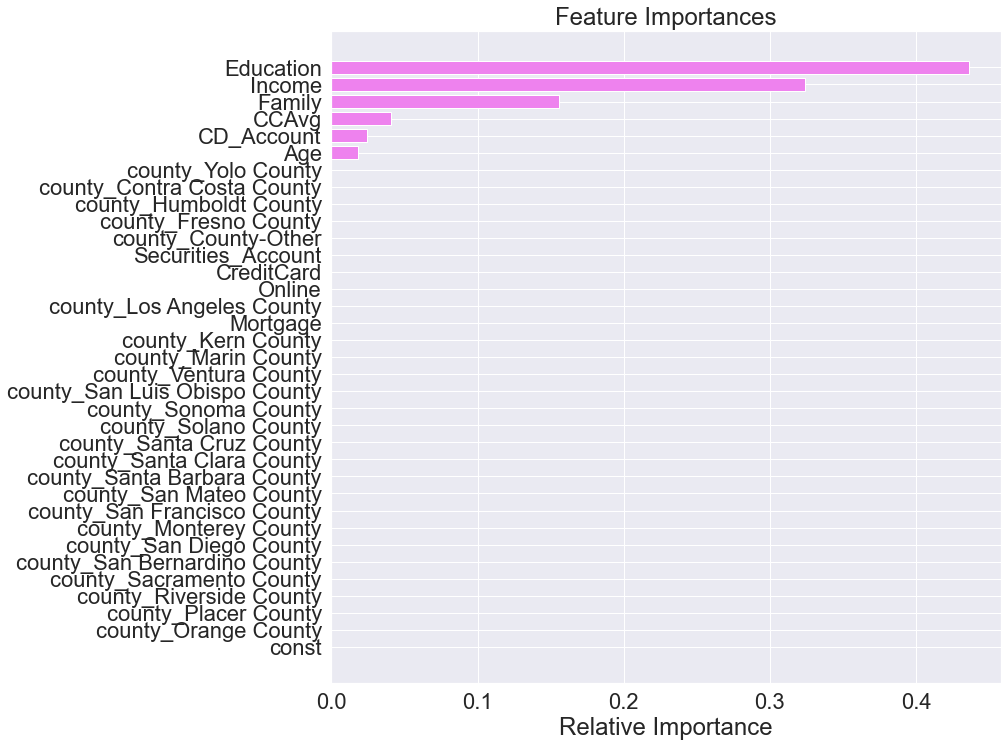

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [474]:
importances = bestmodel.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Again, Education and Income are the two most important features, followed by Family, average credit card spending, CD account ownership and age.  None of the other features appear to have importance. 

#### Performance Comparison

In [482]:
# train performance comparison

models_train_comp_df = pd.concat(
    [
        scores_dtreeTr.T,
        scores_dtree1Tr.T,
        scores_estimatorTr.T,
        scores_bestmodelTr.T,
        scores_bestmetricTr.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree SKlearn",
    "Decision Tree (random depth=4)",
    "Decision Tree (Hyperparameters)",
    "Decision Tree (Best Model - CCP Alpha)",
    "Decision Tree (Best Metrics - CCP Alpha)",
]
print("Train set performance comparison:")
models_train_comp_df

Train set performance comparison:


Decision Tree SKlearn  Decision Tree (random depth=4)  \
Accuracy                     1.0                        0.988571   
Recall                       1.0                        0.912387   
Precision                    1.0                        0.964856   
F1                           1.0                        0.937888   

           Decision Tree (Hyperparameters)  \
Accuracy                          0.989714   
Recall                            0.927492   
Precision                         0.962382   
F1                                0.944615   

           Decision Tree (Best Model - CCP Alpha)  \
Accuracy                                 0.992000   
Recall                                   0.945619   
Precision                                0.969040   
F1                                       0.957187   

           Decision Tree (Best Metrics - CCP Alpha)  
Accuracy                                   0.987143  
Recall                                     0.897281  
Precision                                  0.964286  
F1                                         0.929577

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [480]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        scores_dtreeTs.T,
        scores_dtree1Ts.T,
        scores_estimatorTs.T,
        scores_bestmodelTs.T,
        scores_bestmetricTs.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree SKlearn",
    "Decision Tree (random depth=4)",
    "Decision Tree (Hyperparameters)",
    "Decision Tree (Best Model - CCP Alpha)",
    "Decision Tree (Best Metrics - CCP Alpha)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Decision Tree SKlearn  Decision Tree (random depth=4)  \
Accuracy                0.980000                        0.981333   
Recall                  0.872483                        0.865772   
Precision               0.921986                        0.941606   
F1                      0.896552                        0.902098   

           Decision Tree (Hyperparameters)  \
Accuracy                          0.981333   
Recall                            0.879195   
Precision                         0.929078   
F1                                0.903448   

           Decision Tree (Best Model - CCP Alpha)  \
Accuracy                                 0.981333   
Recall                                   0.879195   
Precision                                0.929078   
F1                                       0.903448   

           Decision Tree (Best Metrics - CCP Alpha)  
Accuracy                                   0.980000  
Recall                                     0.845638  
Precision                                  0.947368  
F1                                         0.893617

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Business Insights

* Individuals with an income of minimally 116.5k USD, spending a average of 2.95k USD per month on credit cards and with an education of at least a Bachelors degree, plus addition studies, are the most likely customers to accept a personal loan
* Individuals least likely to accept a loan are those with an income less than 92.5k USD, without a 4-year college degree, an average family size of 2.5 members or less, and are less than 63.5 years old
* Persons with certificates of deposit also tend to be more likely to accept a personal loan
* Geographic location doesn't appear to have any impact on this analysis